# Sales Data for Segmentation
### Author: Alex Heinz
## Objective
Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately

In this capstone, I am building unsupervised machine learning models:

<ul>
<li>To solve a business problem and predict customer segmentation</li>
<li>Evaluate how well the models can predict customer segmentation based on customer sales data.</li>
</ul>

## Hypothesis
<ul>
    <li>Ho: There is no significant difference in characteristics between customers regarding Deal Size in the US.</li>
    <li>Ha: There is a significant difference in characteristics between customers regarding Deal Size in the US.</li>
</ul>


## Data

For the Sales Data, I used [Sample Sales Data](https://www.kaggle.com/kyanyoga/sample-sales-data) written by Maria Carina Roldan, Pentaho Community Member, BI consultant. For the U.S. Household Income Data, I used [U.S. Household Income Data](https://www.kaggle.com/goldenoakresearch/us-household-income-stats-geo-locations?select=kaggle_income.csv) The datasets contain a total of roughly 35,000 observations and 44 variables.  The datasets provide detailed information about sales data, order information, U.S. household income by postal code and customers including:

<ul>
    <li>What products are available</li>
    <li>Customer account information</li>
    <li>Demographic information abbout customers</li>
</ul>

## Import Libraries

In [1]:
#import libraries
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#KMeans
from sklearn.cluster import KMeans
#StandardScaler
from sklearn.preprocessing import StandardScaler
#PCA
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
#TSNE
from sklearn.manifold import TSNE
# warnings
import warnings
warnings.filterwarnings('ignore')
#Dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
#AggCluster
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets, metrics

## Load and explore the Sales data


In [2]:
#Load and read the Sales csv file
df = pd.read_csv(r'/Users/alexanderheinz/Downloads/sales_data_sample_2.csv', encoding='unicode_escape')

In [3]:
#display max rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#preview the data
df.head()

ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  PRODUCTLINE  MSRP  \
0   2/24/2003 0:00  Shipped       1         2     2003  Motorcycles    95   
1    5/7/2003 0:00  Shipped       2         5     2003  Motorcycles    95   
2    7/1/2003 0:00  Shipped       3         7     2003  Motorcycles    95   
3   8/25/2003 0:00  Shipped       3         8     2003  Motorcycles    95   
4  10/10/2003 0:00  Shipped       4        10     2003  Motorcycles    95   

  PRODUCTCODE              CUSTOMERNAME             PHONE  \
0    S10_1678         Land of Toys Inc.        2125557818   
1    S10_1678        Reims Collectables        26.47.1555   
2    S10_1678           Lyon Souveniers  +33 1 46 62 7555   
3    S10_1678         Toys4GrownUps.com        6265557265   
4    S10_1678  Corporate Gift Ideas Co.        6505551386   

                    ADDRESSLINE1 ADDRESSLINE2           CITY STATE POSTALCODE  \
0        897 Long Airport Avenue          NaN            NYC    NY      10022   
1             59 rue de l'Abbaye          NaN          Reims   NaN      51100   
2  27 rue du Colonel Pierre Avia          NaN          Paris   NaN      75508   
3             78934 Hillside Dr.          NaN       Pasadena    CA      90003   
4                7734 Strong St.          NaN  San Francisco    CA        NaN   

  COUNTRY TERRITORY CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE  
0     USA       NaN              Yu             Kwai    Small  
1  France      EMEA         Henriot             Paul    Small  
2  France      EMEA        Da Cunha           Daniel   Medium  
3     USA       NaN           Young            Julie   Medium  
4     USA       NaN           Brown            Julie   Medium

In [5]:
#Get dimension of the data
df.shape

(2823, 25)

In [6]:
#Look at sales data features
print(df.columns)

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')


## Load and explore the Postal Code/ Mean Income data


In [7]:
##Load and read the Postal Code/Mean Income csv file
income = pd.read_csv(r'/Users/alexanderheinz/Downloads/1876_28122_bundle_archive/kaggle_income.csv', encoding='unicode_escape')

In [8]:
#preview the data
income.head()

id  State_Code State_Name State_ab          County            City  \
0  1011000           1    Alabama       AL   Mobile County       Chickasaw   
1  1011010           1    Alabama       AL  Barbour County      Louisville   
2  1011020           1    Alabama       AL   Shelby County      Columbiana   
3  1011030           1    Alabama       AL   Mobile County         Satsuma   
4  1011040           1    Alabama       AL   Mobile County  Dauphin Island   

             Place  Type Primary  Zip_Code Area_Code     ALand     AWater  \
0   Chickasaw city  City   place     36611       251  10894952     909156   
1        Clio city  City   place     36048       334  26070325      23254   
2  Columbiana city  City   place     35051       205  44835274     261034   
3      Creola city  City   place     36572       251  36878729    2374530   
4   Dauphin Island  Town   place     36528       251  16204185  413605152   

         Lat        Lon   Mean  Median  Stdev        sum_w  
0  30.771450 -88.079697  38773   30506  33101  1638.260513  
1  31.708516 -85.611039  37725   19528  43789   258.017685  
2  33.191452 -86.615618  54606   31930  57348   926.031000  
3  30.874343 -88.009442  63919   52814  47707   378.114619  
4  30.250913 -88.171268  77948   67225  54270   282.320328

In [9]:
#Get dimension of the data
income.shape

(32526, 19)

In [10]:
#Look at income data features
print(income.columns)

Index(['id', 'State_Code', 'State_Name', 'State_ab', 'County', 'City', 'Place',
       'Type', 'Primary', 'Zip_Code', 'Area_Code', 'ALand', 'AWater', 'Lat',
       'Lon', 'Mean', 'Median', 'Stdev', 'sum_w'],
      dtype='object')


### Drop Columns

In [11]:
#drop features that are not significatant in mean household income. Only interested in zip code, lat, long, and mean.
income.drop(['id', 'State_Code', 'State_Name', 'State_ab', 'County', 'City', 'Place',
       'Type', 'Primary', 'Area_Code', 'ALand', 'AWater', 'Median', 'Stdev', 'sum_w'], axis = 1, inplace=True)

In [12]:
#preview after dropped features
income.head()

Zip_Code        Lat        Lon   Mean
0     36611  30.771450 -88.079697  38773
1     36048  31.708516 -85.611039  37725
2     35051  33.191452 -86.615618  54606
3     36572  30.874343 -88.009442  63919
4     36528  30.250913 -88.171268  77948

In [13]:
#rename Zip Code column to match Sales df at POSTALCODE
income = income.rename(columns={'Zip_Code': 'POSTALCODE'})

In [14]:
#preview income csv after name change
income.head()

POSTALCODE        Lat        Lon   Mean
0       36611  30.771450 -88.079697  38773
1       36048  31.708516 -85.611039  37725
2       35051  33.191452 -86.615618  54606
3       36572  30.874343 -88.009442  63919
4       36528  30.250913 -88.171268  77948

In [15]:
## Join Sales data and Postalcode data

In [16]:
#join df and income data on POSTALCODE
merged = pd.concat([df, income], axis=1, join='inner')

In [17]:
merged.head()

ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  PRODUCTLINE  MSRP  \
0   2/24/2003 0:00  Shipped       1         2     2003  Motorcycles    95   
1    5/7/2003 0:00  Shipped       2         5     2003  Motorcycles    95   
2    7/1/2003 0:00  Shipped       3         7     2003  Motorcycles    95   
3   8/25/2003 0:00  Shipped       3         8     2003  Motorcycles    95   
4  10/10/2003 0:00  Shipped       4        10     2003  Motorcycles    95   

  PRODUCTCODE              CUSTOMERNAME             PHONE  \
0    S10_1678         Land of Toys Inc.        2125557818   
1    S10_1678        Reims Collectables        26.47.1555   
2    S10_1678           Lyon Souveniers  +33 1 46 62 7555   
3    S10_1678         Toys4GrownUps.com        6265557265   
4    S10_1678  Corporate Gift Ideas Co.        6505551386   

                    ADDRESSLINE1 ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue          NaN            NYC    NY   
1             59 rue de l'Abbaye          NaN          Reims   NaN   
2  27 rue du Colonel Pierre Avia          NaN          Paris   NaN   
3             78934 Hillside Dr.          NaN       Pasadena    CA   
4                7734 Strong St.          NaN  San Francisco    CA   

   POSTALCODE COUNTRY TERRITORY CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE  \
0       10022     USA       NaN              Yu             Kwai    Small   
1       51100  France      EMEA         Henriot             Paul    Small   
2       75508  France      EMEA        Da Cunha           Daniel   Medium   
3       90003     USA       NaN           Young            Julie   Medium   
4         NaN     USA       NaN           Brown            Julie   Medium   

   POSTALCODE        Lat        Lon   Mean  
0       36611  30.771450 -88.079697  38773  
1       36048  31.708516 -85.611039  37725  
2       35051  33.191452 -86.615618  54606  
3       36572  30.874343 -88.009442  63919  
4       36528  30.250913 -88.171268  77948

In [18]:
#look at merged summary
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


## Rename 'merged' data to df

In [19]:
# Rename the merged data to df. 
df = merged

In [20]:
# Look at the dimension of the combined data
df.shape

(2823, 29)

In [21]:
# Look at the preview of combined data
df.head()

ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  PRODUCTLINE  MSRP  \
0   2/24/2003 0:00  Shipped       1         2     2003  Motorcycles    95   
1    5/7/2003 0:00  Shipped       2         5     2003  Motorcycles    95   
2    7/1/2003 0:00  Shipped       3         7     2003  Motorcycles    95   
3   8/25/2003 0:00  Shipped       3         8     2003  Motorcycles    95   
4  10/10/2003 0:00  Shipped       4        10     2003  Motorcycles    95   

  PRODUCTCODE              CUSTOMERNAME             PHONE  \
0    S10_1678         Land of Toys Inc.        2125557818   
1    S10_1678        Reims Collectables        26.47.1555   
2    S10_1678           Lyon Souveniers  +33 1 46 62 7555   
3    S10_1678         Toys4GrownUps.com        6265557265   
4    S10_1678  Corporate Gift Ideas Co.        6505551386   

                    ADDRESSLINE1 ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue          NaN            NYC    NY   
1             59 rue de l'Abbaye          NaN          Reims   NaN   
2  27 rue du Colonel Pierre Avia          NaN          Paris   NaN   
3             78934 Hillside Dr.          NaN       Pasadena    CA   
4                7734 Strong St.          NaN  San Francisco    CA   

   POSTALCODE COUNTRY TERRITORY CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE  \
0       10022     USA       NaN              Yu             Kwai    Small   
1       51100  France      EMEA         Henriot             Paul    Small   
2       75508  France      EMEA        Da Cunha           Daniel   Medium   
3       90003     USA       NaN           Young            Julie   Medium   
4         NaN     USA       NaN           Brown            Julie   Medium   

   POSTALCODE        Lat        Lon   Mean  
0       36611  30.771450 -88.079697  38773  
1       36048  31.708516 -85.611039  37725  
2       35051  33.191452 -86.615618  54606  
3       36572  30.874343 -88.009442  63919  
4       36528  30.250913 -88.171268  77948

## Describe each column

In [22]:
# describe each column
df.describe(include= 'all')

ORDERNUMBER  QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER  \
count    2823.000000      2823.000000  2823.000000      2823.000000   
unique           NaN              NaN          NaN              NaN   
top              NaN              NaN          NaN              NaN   
freq             NaN              NaN          NaN              NaN   
mean    10258.725115        35.092809    83.658544         6.466171   
std        92.085478         9.741443    20.174277         4.225841   
min     10100.000000         6.000000    26.880000         1.000000   
25%     10180.000000        27.000000    68.860000         3.000000   
50%     10262.000000        35.000000    95.700000         6.000000   
75%     10333.500000        43.000000   100.000000         9.000000   
max     10425.000000        97.000000   100.000000        18.000000   

               SALES        ORDERDATE   STATUS       QTR_ID     MONTH_ID  \
count    2823.000000             2823     2823  2823.000000  2823.000000   
unique           NaN              252        6          NaN          NaN   
top              NaN  11/14/2003 0:00  Shipped          NaN          NaN   
freq             NaN               38     2617          NaN          NaN   
mean     3553.889072              NaN      NaN     2.717676     7.092455   
std      1841.865106              NaN      NaN     1.203878     3.656633   
min       482.130000              NaN      NaN     1.000000     1.000000   
25%      2203.430000              NaN      NaN     2.000000     4.000000   
50%      3184.800000              NaN      NaN     3.000000     8.000000   
75%      4508.000000              NaN      NaN     4.000000    11.000000   
max     14082.800000              NaN      NaN     4.000000    12.000000   

           YEAR_ID   PRODUCTLINE         MSRP PRODUCTCODE  \
count   2823.00000          2823  2823.000000        2823   
unique         NaN             7          NaN         109   
top            NaN  Classic Cars          NaN    S18_3232   
freq           NaN           967          NaN          52   
mean    2003.81509           NaN   100.715551         NaN   
std        0.69967           NaN    40.187912         NaN   
min     2003.00000           NaN    33.000000         NaN   
25%     2003.00000           NaN    68.000000         NaN   
50%     2004.00000           NaN    99.000000         NaN   
75%     2004.00000           NaN   124.000000         NaN   
max     2005.00000           NaN   214.000000         NaN   

                 CUSTOMERNAME           PHONE        ADDRESSLINE1  \
count                    2823            2823                2823   
unique                     92              91                  92   
top     Euro Shopping Channel  (91) 555 94 44  C/ Moralzarzal, 86   
freq                      259             259                 259   
mean                      NaN             NaN                 NaN   
std                       NaN             NaN                 NaN   
min                       NaN             NaN                 NaN   
25%                       NaN             NaN                 NaN   
50%                       NaN             NaN                 NaN   
75%                       NaN             NaN                 NaN   
max                       NaN             NaN                 NaN   

       ADDRESSLINE2    CITY STATE  POSTALCODE COUNTRY TERRITORY  \
count           302    2823  1337        2747    2823      1749   
unique            9      73    16          73      19         3   
top         Level 3  Madrid    CA       28034     USA      EMEA   
freq             55     304   416         259    1004      1407   
mean            NaN     NaN   NaN         NaN     NaN       NaN   
std             NaN     NaN   NaN         NaN     NaN       NaN   
min             NaN     NaN   NaN         NaN     NaN       NaN   
25%             NaN     NaN   NaN         NaN     NaN       NaN   
50%             NaN     NaN   NaN         NaN     NaN       NaN   
75%        

## Look at data types of each column

In [23]:
# Look at data types of each column
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
POSTALCODE            int64
Lat                 float64
Lon                 float64
Mean                  int64
dtype: object

## Check for null values

In [24]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
POSTALCODE             0
Lat                    0
Lon                    0
Mean                   0
dtype: int64

Out of the nulls, Address Line 2/ State/ Territory will be dropped. Postal Code nulls are important, eventhough there are few.

### Change ORDERDATE from 'object' to 'datetime'

In [25]:
#df['ORDERMONTH'] = df['ORDERDATE'].str.split('/').str[0]
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])


## Explore the variables

### Get summary statistics of quantitative variables

In [26]:
quant_vars = ['QUANTITYORDERED','PRICEEACH','SALES','MSRP', 'Mean']
df[quant_vars].describe()

QUANTITYORDERED    PRICEEACH         SALES         MSRP           Mean
count      2823.000000  2823.000000   2823.000000  2823.000000    2823.000000
mean         35.092809    83.658544   3553.889072   100.715551   65040.949345
std           9.741443    20.174277   1841.865106    40.187912   30583.344510
min           6.000000    26.880000    482.130000    33.000000       0.000000
25%          27.000000    68.860000   2203.430000    68.000000   43788.500000
50%          35.000000    95.700000   3184.800000    99.000000   57474.000000
75%          43.000000   100.000000   4508.000000   124.000000   80195.000000
max          97.000000   100.000000  14082.800000   214.000000  242857.000000

Summary statistics look good, all seems accurate at first look.

#### Order Quantity Distribution Plot

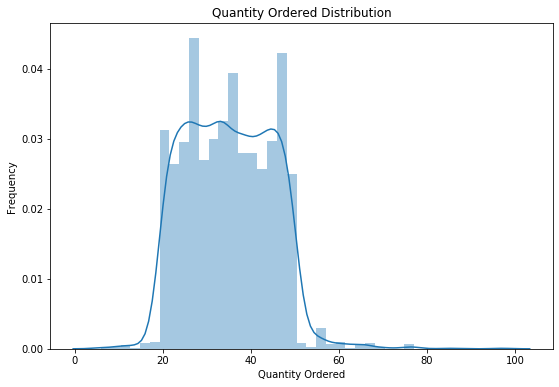

In [27]:
plt.figure(figsize=(9,6))
sns.distplot(df['QUANTITYORDERED'])
plt.title('Quantity Ordered Distribution')
plt.xlabel('Quantity Ordered')
plt.ylabel('Frequency')
plt.show()

Most order quantities are between 20 and 40 units

#### Mean Household Income Distribution

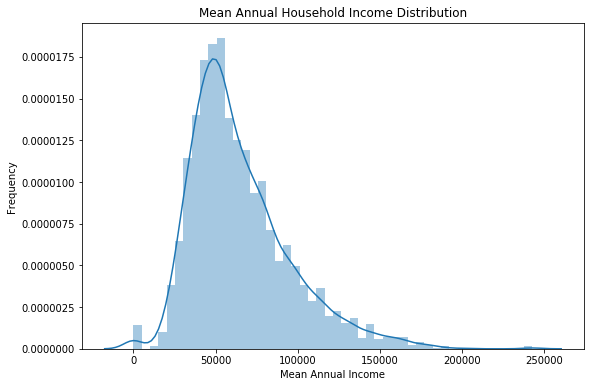

In [28]:
plt.figure(figsize=(9,6))
sns.distplot(df['Mean'])
plt.title('Mean Annual Household Income Distribution')
plt.xlabel('Mean Annual Income')
plt.ylabel('Frequency')
plt.show()

From the Mean Household distribution plot, you can see that most of the customers annual income, based on zip code, the median income is around 55,000 dollars and many incomes range from 40,000 to 80,000 dollars.

#### Price of order distribution

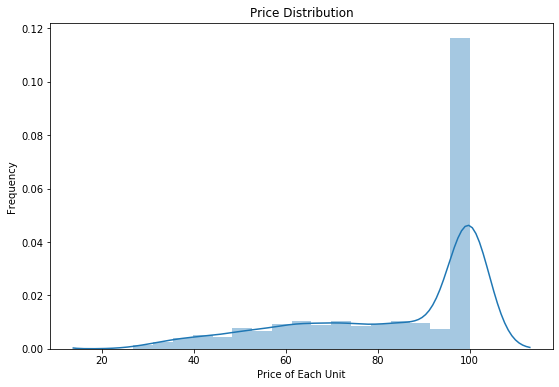

In [29]:
plt.figure(figsize=(9,6))
sns.distplot(df['PRICEEACH'])
plt.title('Price Distribution')
plt.xlabel('Price of Each Unit')
plt.ylabel('Frequency')
plt.show()

Seems that there is a high frequency of units sold at 100 dollars.

In [30]:
#to investigate high frequency of units sold at $100.

#price_100 = df.loc[df['PRICEEACH'] == 100]
#print('\nResult :\n', price_100)

#### Sales Distribution Plot

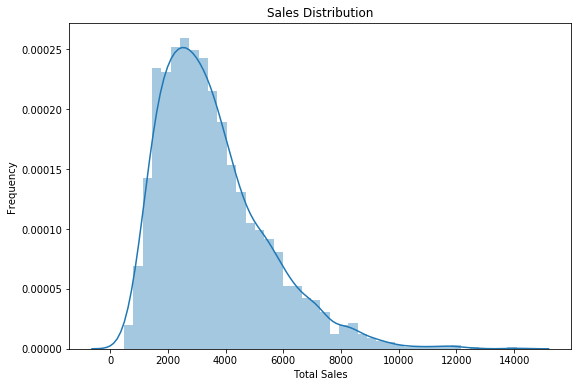

In [31]:
plt.figure(figsize=(9,6))
sns.distplot(df['SALES'])
plt.title('Sales Distribution')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()

The Sales Distribution shows a great visual reprentation on the DEALSIZE we will be clustering. Mean looks to be around 3,000 dollars.

#### Deal Size Bar Plot Distribution

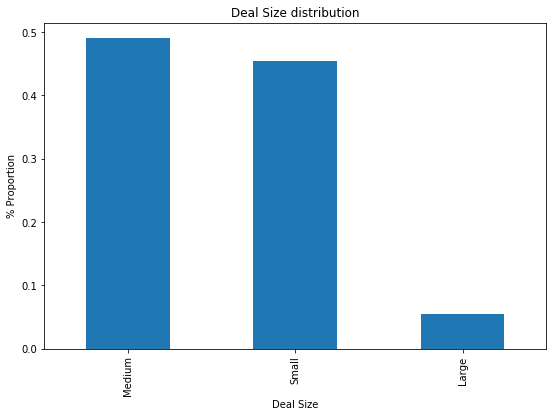

In [32]:
plt.figure(figsize=(9,6))
df['DEALSIZE'].value_counts(normalize = True).plot(kind = 'bar')
plt.title('Deal Size distribution')
plt.xlabel('Deal Size')
plt.ylabel('% Proportion')
plt.show()

Looking at the Deal Size Bar Plot Distribution, you can see that Medium contains abbout 50% of the proportion and Small deal size contains abbout 44% where large deals fall at around 6%

## Monthly Revenue

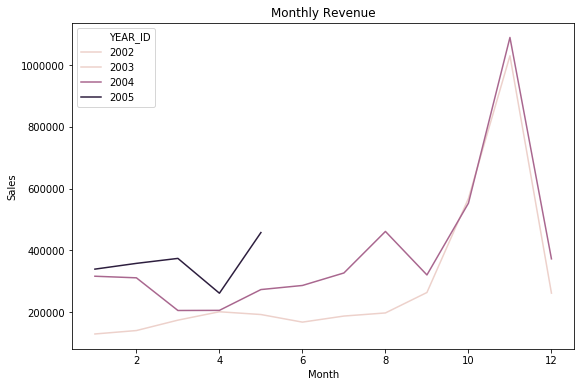

In [33]:
#Monthly Revenue
plt.figure(figsize=(9,6))

monthly_revenue = df.groupby(['YEAR_ID','MONTH_ID'])['SALES'].sum().reset_index()
monthly_revenue
sns.lineplot(x="MONTH_ID", y="SALES",hue="YEAR_ID", data=monthly_revenue)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Revenue')
plt.show()

Looking at monthly revenue, the sales are highest in November. This makes sense because this is the time when stores put things on sale, get ride of inventory to make room for the holidays and new product in the new year. We can see that year over year, revenue is increasing as well.

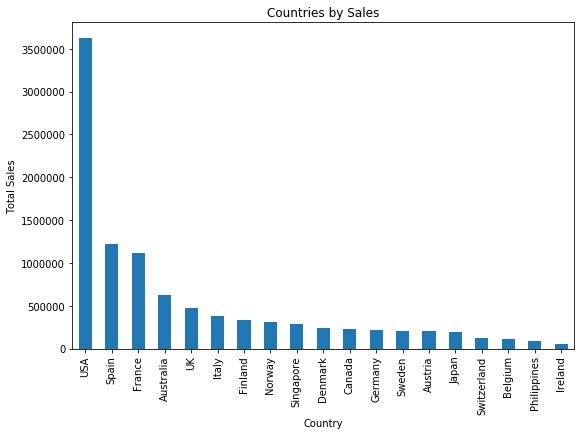

In [34]:
plt.figure(figsize=(9,6))
top_cities = df.groupby(['COUNTRY'])['SALES'].sum().sort_values(ascending=False)
top_cities.plot(kind = 'bar')
plt.title('Countries by Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()

## U.S.

For the rest of the analysis I will be continuing with all records for U.S. sales. Since Total Sales is almost 50% from the U.S. alone, and  since I have brought in the U.S. household income by postal code dataset, I feel the best approach is to combine these and continue my project from the joined datasets. Annual Mean Household Income will help my models be more accurate.

#### Fill in Null Values for POSTALCODE.

In [35]:
#fill in missing values - Los Angeles and San Francisco have the only null values
df.loc[df['CITY'] == 'Los Angeles', 'POSTALCODE'] = 90011
df.loc[df['CITY'] == 'San Francisco', 'POSTALCODE'] = 94112


#### Since we have Mean Income for POSTALCODE in US, we will just look at the US accounts which has the majority of the sales. 

In [36]:
df = df[df['COUNTRY'] == 'USA']

In [37]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2         901
CITY                   0
STATE                  0
POSTALCODE             0
COUNTRY                0
TERRITORY           1004
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
POSTALCODE             0
Lat                    0
Lon                    0
Mean                   0
dtype: int64

## Visualize the Data

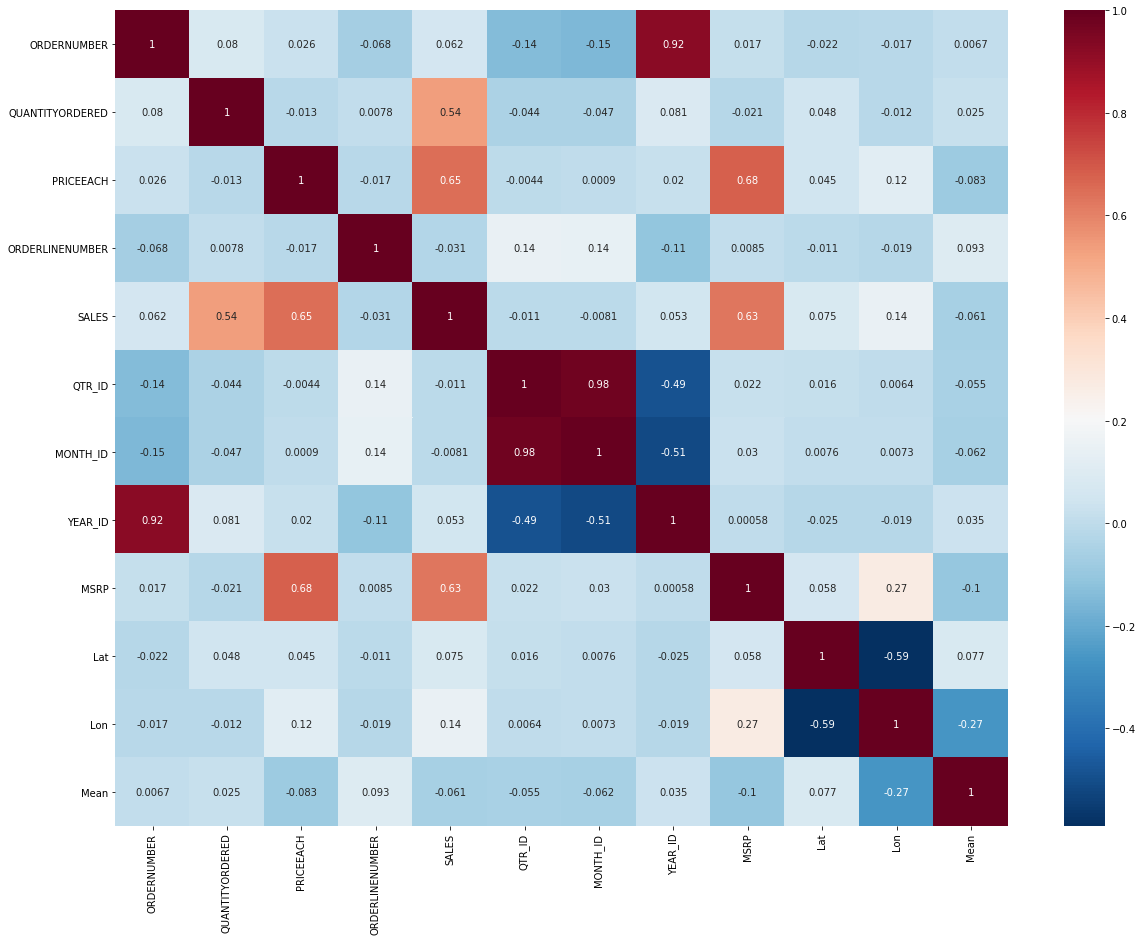

In [38]:
# Correlation heatmap
plt.subplots(figsize=(20,15))
ax = plt.axes()
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap='RdBu_r',
            annot=True)

#### Strong correlation between multiple features
<ul>
<li>Quantity Ordered : Sales, Deal Size</li>
<li>Price Each : Sales, MSRP, Deal Size</li>
<li>Sales : Quantity Ordered, Price Each, MSRP, Deal Size </li>
</ul>


In [39]:
#Look at feature names for drop.
columns = list(df.columns)
columns

['ORDERNUMBER',
 'QUANTITYORDERED',
 'PRICEEACH',
 'ORDERLINENUMBER',
 'SALES',
 'ORDERDATE',
 'STATUS',
 'QTR_ID',
 'MONTH_ID',
 'YEAR_ID',
 'PRODUCTLINE',
 'MSRP',
 'PRODUCTCODE',
 'CUSTOMERNAME',
 'PHONE',
 'ADDRESSLINE1',
 'ADDRESSLINE2',
 'CITY',
 'STATE',
 'POSTALCODE',
 'COUNTRY',
 'TERRITORY',
 'CONTACTLASTNAME',
 'CONTACTFIRSTNAME',
 'DEALSIZE',
 'POSTALCODE',
 'Lat',
 'Lon',
 'Mean']

## Drop Variables for model

In [40]:
#Drop Variables that don't carry significance or high multicollinearity
df.drop(['ORDERNUMBER', 'QTR_ID', 'PRODUCTCODE', 'COUNTRY', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CUSTOMERNAME',
        'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'ORDERDATE', 'TERRITORY', 'STATE', 'CITY', 'POSTALCODE', 'STATUS'], axis = 1, inplace=True)

In [41]:
#unique data values
pd.Series({a: df[a].unique() for a in df})

QUANTITYORDERED    [30, 45, 49, 36, 22, 23, 28, 34, 46, 42, 37, 2...
PRICEEACH          [95.7, 83.26, 100.0, 96.66, 98.57, 94.74, 76.3...
ORDERLINENUMBER    [2, 6, 14, 1, 7, 4, 11, 8, 3, 9, 10, 5, 17, 16...
SALES              [2871.0, 3746.7, 5205.27, 3479.76, 2168.54, 23...
MONTH_ID                     [2, 8, 10, 12, 4, 5, 6, 11, 3, 7, 1, 9]
YEAR_ID                                           [2003, 2004, 2005]
PRODUCTLINE        [Motorcycles, Classic Cars, Trucks and Buses, ...
MSRP               [95, 214, 118, 193, 136, 147, 194, 207, 150, 1...
DEALSIZE                                      [Small, Medium, Large]
Lat                [30.77145, 30.874343, 30.250913, 34.045414, 34...
Lon                [-88.079697, -88.009442, -88.17126800000001, -...
Mean               [38773, 63919, 77948, 50715, 57994, 42251, 279...
dtype: object

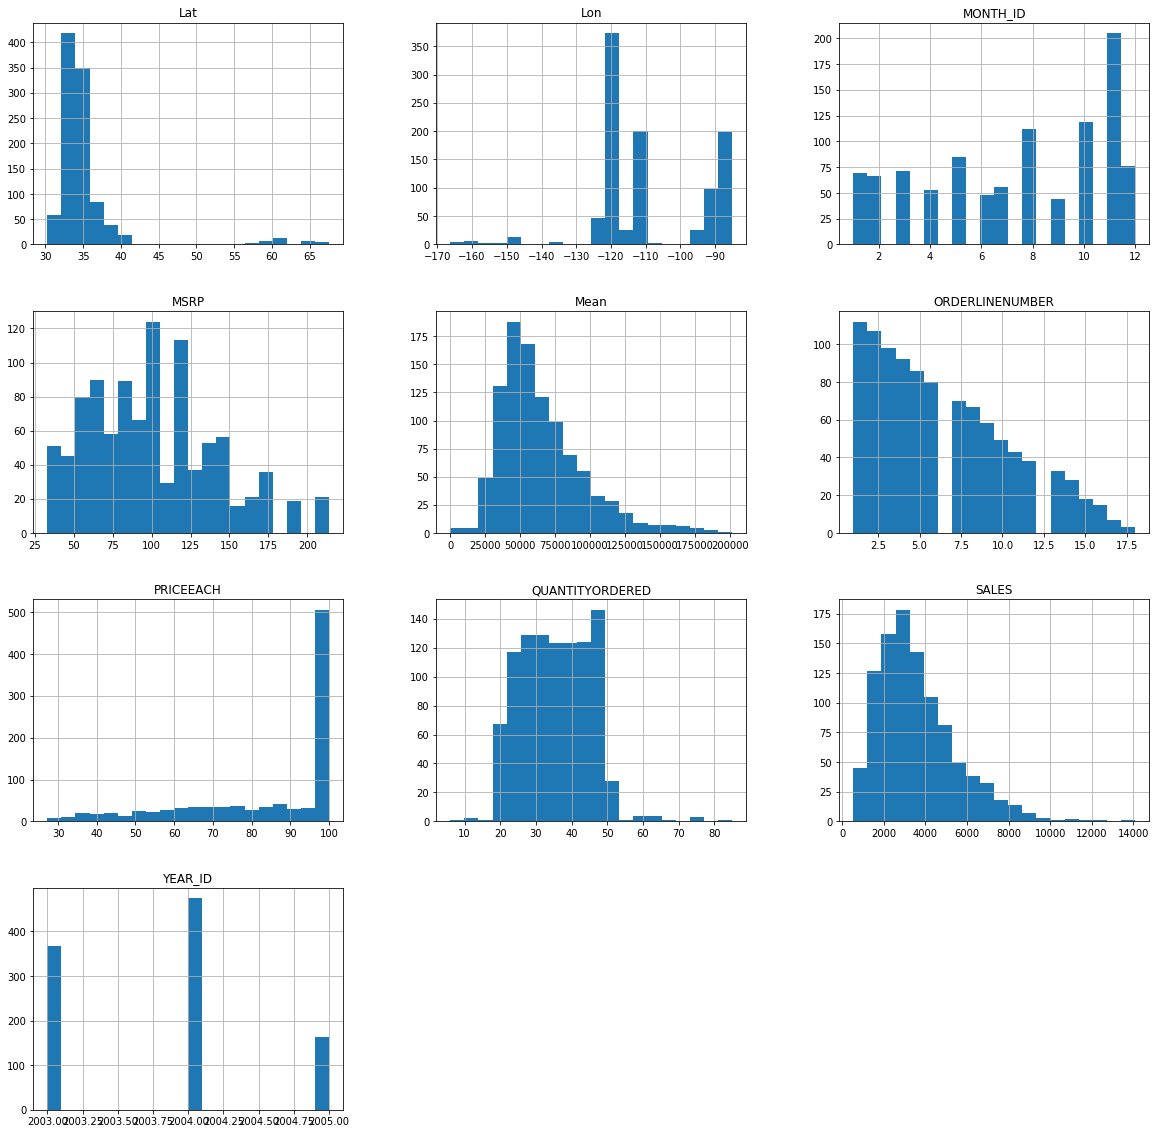

In [42]:
hist = df.hist(bins=20, figsize=(20, 20))


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1004 entries, 0 to 2822
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  1004 non-null   int64  
 1   PRICEEACH        1004 non-null   float64
 2   ORDERLINENUMBER  1004 non-null   int64  
 3   SALES            1004 non-null   float64
 4   MONTH_ID         1004 non-null   int64  
 5   YEAR_ID          1004 non-null   int64  
 6   PRODUCTLINE      1004 non-null   object 
 7   MSRP             1004 non-null   int64  
 8   DEALSIZE         1004 non-null   object 
 9   Lat              1004 non-null   float64
 10  Lon              1004 non-null   float64
 11  Mean             1004 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 102.0+ KB


## Outlier Detection

0.0     1.0
0.1     1.0
0.2     2.0
0.3     3.0
0.4     4.0
0.5     6.0
0.6     7.0
0.7     8.0
0.8    10.0
0.9    13.0
1.0    18.0
Name: ORDERLINENUMBER, dtype: float64

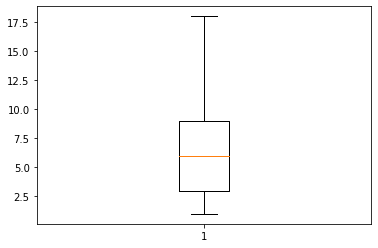

In [44]:
#Detect outliers for ORDERLINENUMBER variable
plt.boxplot(df.ORDERLINENUMBER)
df['ORDERLINENUMBER'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0     27.220
0.1     49.909
0.2     64.330
0.3     74.840
0.4     85.774
0.5     96.880
0.6    100.000
0.7    100.000
0.8    100.000
0.9    100.000
1.0    100.000
Name: PRICEEACH, dtype: float64

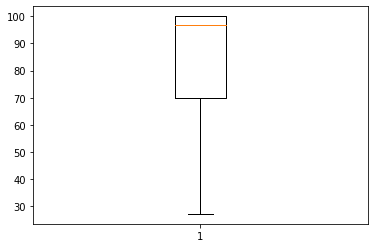

In [45]:
#Detect outliers for PRICEEACH variable
plt.boxplot(df.PRICEEACH)
df['PRICEEACH'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0         0.0
0.1     34391.1
0.2     41067.0
0.3     46281.2
0.4     51414.4
0.5     57157.0
0.6     64866.6
0.7     74807.6
0.8     85264.0
0.9    105788.9
1.0    201716.0
Name: Mean, dtype: float64

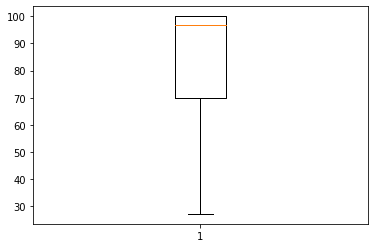

In [46]:
#Detect outliers for Mean variable
plt.boxplot(df.PRICEEACH)
df['Mean'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

No outliers noted for above variables

## Rename Dealsize
Rename Small, Medium and Large to 0,1,2

In [47]:
DEALSIZE = {'Small' : 0, 'Medium' : 1, 'Large': 2}
df.DEALSIZE = [DEALSIZE[i] for i in df.DEALSIZE]
df.head()

QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  MONTH_ID  YEAR_ID  \
0               30      95.70                2  2871.00         2     2003   
3               45      83.26                6  3746.70         8     2003   
4               49     100.00               14  5205.27        10     2003   
5               36      96.66                1  3479.76        10     2003   
8               22      98.57                2  2168.54        12     2003   

   PRODUCTLINE  MSRP  DEALSIZE        Lat        Lon   Mean  
0  Motorcycles    95         0  30.771450 -88.079697  38773  
3  Motorcycles    95         1  30.874343 -88.009442  63919  
4  Motorcycles    95         1  30.250913 -88.171268  77948  
5  Motorcycles    95         1  34.045414 -86.882670  50715  
8  Motorcycles    95         0  34.326504 -86.765318  57994

## List of categorical data

In [48]:
#create list of categorical data
non_numeric_columns = df.select_dtypes(['object', 'category']).columns
print(non_numeric_columns)
print("The number of non-numerical columns is {}".format(len(non_numeric_columns)))

Index(['PRODUCTLINE'], dtype='object')
The number of non-numerical columns is 1


In [49]:
#combine 'On Hold' to 'Shipped' and 'In Process' to 'Resolved'
df = df.replace({'STATUS': 'On Hold'}, 'Shipped')
df = df.replace({'STATUS': 'In Process'}, 'Resolved')

## Countplot for Categorical Data

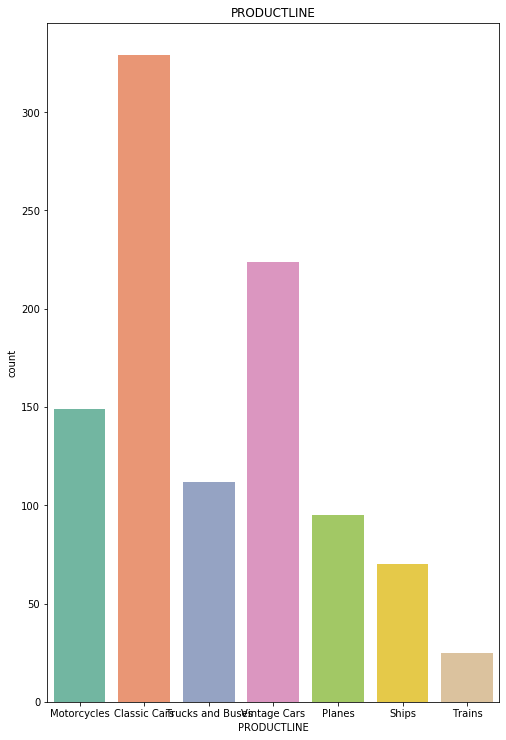

In [50]:
#countplot for each of the categorical columns
variables_to_plot = list(non_numeric_columns)
fig = plt.figure(figsize=(20,60))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(6,3,i+1)
    ax = sns.countplot(x=var_name, data=df, ax=ax, palette='Set2')
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

## Look at the Sales for Deal Size

In [51]:
small_deal = df.loc[df['DEALSIZE'] == 0]
small_deal.loc[small_deal['SALES'].idxmax()]

#small deal is less than $3,000

QUANTITYORDERED         30
PRICEEACH            99.55
ORDERLINENUMBER         11
SALES               2986.5
MONTH_ID                 1
YEAR_ID               2005
PRODUCTLINE         Trains
MSRP                    62
DEALSIZE                 0
Lat                34.0455
Lon               -117.915
Mean                100851
Name: 2272, dtype: object

In [52]:
medium_deal = df.loc[df['DEALSIZE'] == 1]
medium_deal.loc[medium_deal['SALES'].idxmin()]

#medium deal is between $3,000 & $7,000 Sales

QUANTITYORDERED         40
PRICEEACH            75.06
ORDERLINENUMBER         13
SALES               3002.4
MONTH_ID                 5
YEAR_ID               2004
PRODUCTLINE         Planes
MSRP                    68
DEALSIZE                 1
Lat                 34.138
Lon               -118.438
Mean                176545
Name: 2008, dtype: object

In [53]:
large_deal = df.loc[df['DEALSIZE'] == 2]
large_deal.loc[large_deal['SALES'].idxmin()]

#large deal is greater than $7,000 Sales

QUANTITYORDERED              44
PRICEEACH                   100
ORDERLINENUMBER               9
SALES                   7020.64
MONTH_ID                      8
YEAR_ID                    2004
PRODUCTLINE        Classic Cars
MSRP                        147
DEALSIZE                      2
Lat                     34.7471
Lon                    -87.6398
Mean                      61868
Name: 148, dtype: object

### Create list of numerical columns

In [54]:
#create list of numerical columns
numeric_columns = df.select_dtypes(['float64', 'int64', 'uint8']).columns
print(numeric_columns)
print("The number of numerical columns is {}".format(len(numeric_columns)))

Index(['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'MONTH_ID',
       'YEAR_ID', 'MSRP', 'DEALSIZE', 'Lat', 'Lon', 'Mean'],
      dtype='object')
The number of numerical columns is 11


## Examine numeric features via histogram

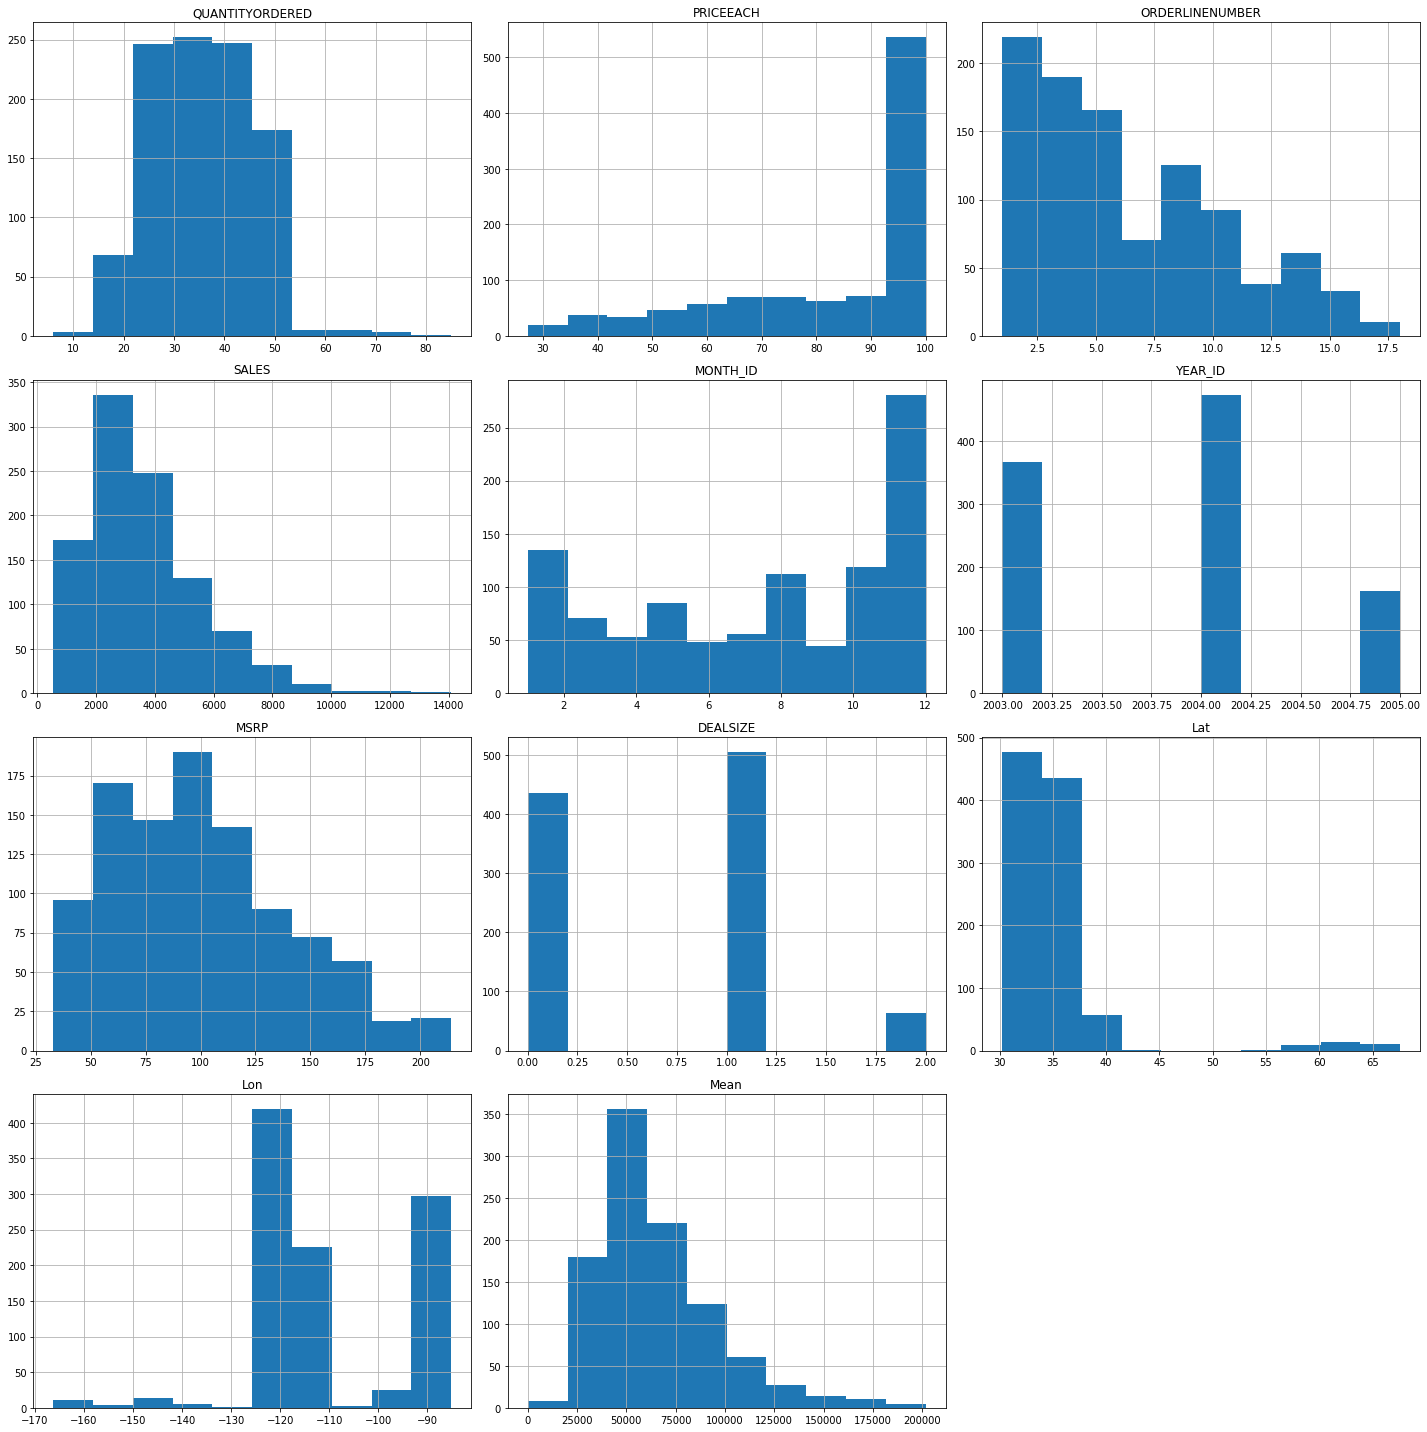

In [55]:
variables_to_plot = list(df[numeric_columns])
fig = plt.figure(figsize=(20,20))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(4,3,i+1)
    df[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()

## Clean the Data

In [56]:
dummy_list = [non_numeric_columns]
for col in dummy_list:
    df = pd.concat([df,pd.get_dummies(df[col], prefix=col, drop_first=True)], axis=1)
    dummy_column_names = list(pd.get_dummies(df[col], prefix=col, drop_first=True).columns)

In [57]:
#check column types
df.dtypes

QUANTITYORDERED                   int64
PRICEEACH                       float64
ORDERLINENUMBER                   int64
SALES                           float64
MONTH_ID                          int64
YEAR_ID                           int64
PRODUCTLINE                      object
MSRP                              int64
DEALSIZE                          int64
Lat                             float64
Lon                             float64
Mean                              int64
PRODUCTLINE_Motorcycles           uint8
PRODUCTLINE_Planes                uint8
PRODUCTLINE_Ships                 uint8
PRODUCTLINE_Trains                uint8
PRODUCTLINE_Trucks and Buses      uint8
PRODUCTLINE_Vintage Cars          uint8
dtype: object

In [58]:
#check for missing values
df.isnull().sum()

QUANTITYORDERED                 0
PRICEEACH                       0
ORDERLINENUMBER                 0
SALES                           0
MONTH_ID                        0
YEAR_ID                         0
PRODUCTLINE                     0
MSRP                            0
DEALSIZE                        0
Lat                             0
Lon                             0
Mean                            0
PRODUCTLINE_Motorcycles         0
PRODUCTLINE_Planes              0
PRODUCTLINE_Ships               0
PRODUCTLINE_Trains              0
PRODUCTLINE_Trucks and Buses    0
PRODUCTLINE_Vintage Cars        0
dtype: int64

In [59]:
#create a list of numeric columns
numeric_columns = df.select_dtypes(['float64', 'int64', 'uint8', 'category']).columns
print(numeric_columns)
print("The number of numerical columns is {}".format(len(numeric_columns)))

Index(['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'MONTH_ID',
       'YEAR_ID', 'MSRP', 'DEALSIZE', 'Lat', 'Lon', 'Mean',
       'PRODUCTLINE_Motorcycles', 'PRODUCTLINE_Planes', 'PRODUCTLINE_Ships',
       'PRODUCTLINE_Trains', 'PRODUCTLINE_Trucks and Buses',
       'PRODUCTLINE_Vintage Cars'],
      dtype='object')
The number of numerical columns is 17


## Model Preparation

In [60]:
# declare features
new_df = df[numeric_columns]
# # standardize them
X = new_df


scaler = StandardScaler()
X_std = scaler.fit_transform(X)

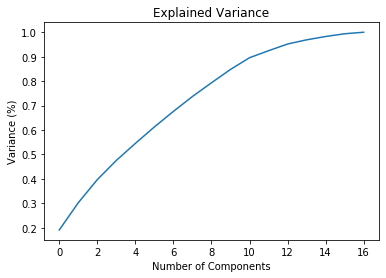

In [61]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(X_std)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

12 components explain around 95% of the variance.

In [62]:
#Define the variables
X = new_df.drop('DEALSIZE', axis=1)
y = new_df['DEALSIZE']
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [63]:
# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

### Find optimal k value via K means

By using the 'elbow graph' method we can identify the best k value to balance the effectiveness between the extremes of one cluster to another for each data point.

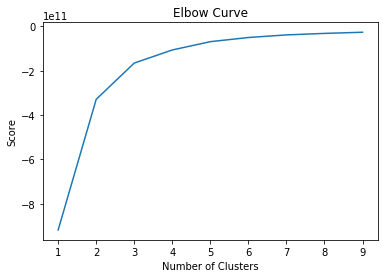

In [64]:
#Elbow Plot for optimal k
clustno = range(1, 10)

kmeans = [KMeans(n_clusters=i) for i in clustno]

score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

plt.plot(clustno, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

It appears from the elbow plot that between 2 and 3 clusters will yield the best results.

In [65]:
for i in range(2,4):
    labels2 = KMeans(n_clusters = i, random_state = 1).fit_predict(X_std)
    print('Silhouette Score for {}-cluster K-Means: {}'.format(i, metrics.silhouette_score(X_std, labels2, metric='euclidean')))

Silhouette Score for 2-cluster K-Means: 0.11134890411050438
Silhouette Score for 3-cluster K-Means: 0.12203587188807154


After calculating Silhouette Scores for a range of K values to find an optimal number of clusters, the best solution is 3. The score is .12, which indicates that there is significant overlap between clusters.

### Split data to ccompare consistancy in samples

In [66]:
#Spliting the data to compare consistancy across a different numbers of clusters
pca = PCA(n_components=12)
X_pca = pca.fit_transform(X_std)
y_pred = KMeans(n_clusters=3, random_state=1).fit_predict(X_pca)

X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_std,
    X_pca,
    test_size=0.5,
    random_state=1)

In [67]:
from sklearn.preprocessing import normalize

In [68]:
#assign a variable for data to leave df alone and for readability
ax = new_df.copy()

#normalize, 2 feat PCA for graphs
X_norm = normalize(ax)
X_pca = PCA(12).fit_transform(X_norm)

In [69]:
#create subsets for cross validation
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_norm,
    X_pca,
    test_size=0.5,
    random_state=1
    )
X1, X2, X_pca1, X_pca2 = train_test_split(
    X_half1,
    X_pcahalf1,
    test_size=0.5,
    random_state=1)
X3, X4, X_pca3, X_pca4 = train_test_split(
    X_half2,
    X_pcahalf2,
    test_size=0.5,
    random_state=1)

#make sure it worked
print('should all be True:',
      len(X1) == len(X_pca1),
      len(X2) == len(X_pca2),
      len(X3) == len(X_pca3),
      len(X4) == len(X_pca4))

should all be True: True True True True


In [70]:
#set df for predictions
ypred = pd.DataFrame()
sil_scores = pd.DataFrame(columns = ['cluster', 'sil_score'])

for counter, data in enumerate([
    (X1, X_pca1),
    (X2, X_pca2),
    (X3, X_pca3),
    (X4, X_pca4)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    #cluster predictions for clusters 2 to 6.
    for nclust in range(2, 5):
        model = KMeans(n_clusters=nclust, random_state=1)
        pred = model.fit_predict(data[0])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred
        #silhouette scores
        labels = model.labels_
        sil_score = metrics.silhouette_score(data[0],
                                             labels,
                                             metric='euclidean')
        sil_scores = sil_scores.append({
            'cluster':'clust' + str(nclust) + '_sample' + str(counter), 
            'sil_score':sil_score},
            ignore_index=True)

In [71]:
sil_scores.sort_values(by='sil_score', ascending=False)


cluster  sil_score
9   clust2_sample3   0.958200
3   clust2_sample1   0.957132
6   clust2_sample2   0.951838
10  clust3_sample3   0.632391
4   clust3_sample1   0.598640
5   clust4_sample1   0.593858
7   clust3_sample2   0.570681
0   clust2_sample0   0.562566
8   clust4_sample2   0.518912
11  clust4_sample3   0.511350
1   clust3_sample0   0.494735
2   clust4_sample0   0.458824

2 cluster sample 3 yields highes silhouette score at 0.96

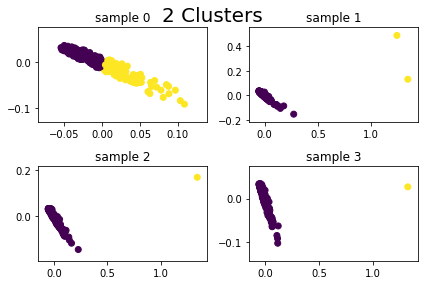

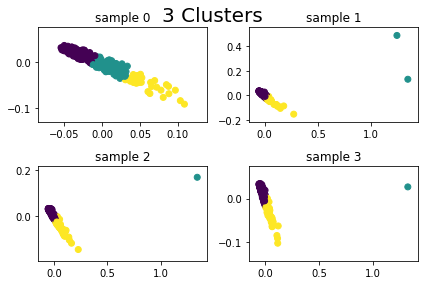

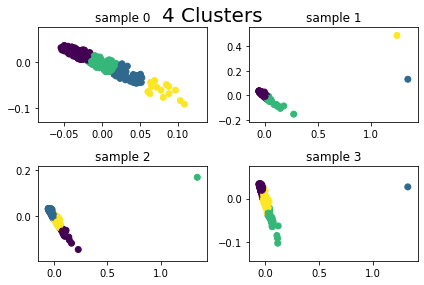

In [72]:
#plot solutions
for cluster in range(2, 5):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(2, 2)
    
    # Make a plot for each sample.
    for i in range(4):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        rows = int(np.floor(i / 2))
        cols = i % 2
        axarr[rows, cols].scatter(x_sub, y_sub, c=c)
        axarr[rows, cols].set_title('sample {}'.format(i))
       
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

Based on the visualizations above, it looks like 2,3 and 4 clusters are consistent across the samples. Since deal size has only 3 possibilites, small/medium/large, 3 clusters would be the ideal way the data would split. I will first examine the data using 3 clusters, then I will continue to explore the data using 2 clusters.

## Model Selection Phase 
### Three Clusters

### K-means
Three Clusters

KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia.

PCA reduces the dimension of your data by combining highly correlated variables together to form a small number of artifical set of variables that account for most variance of the data.

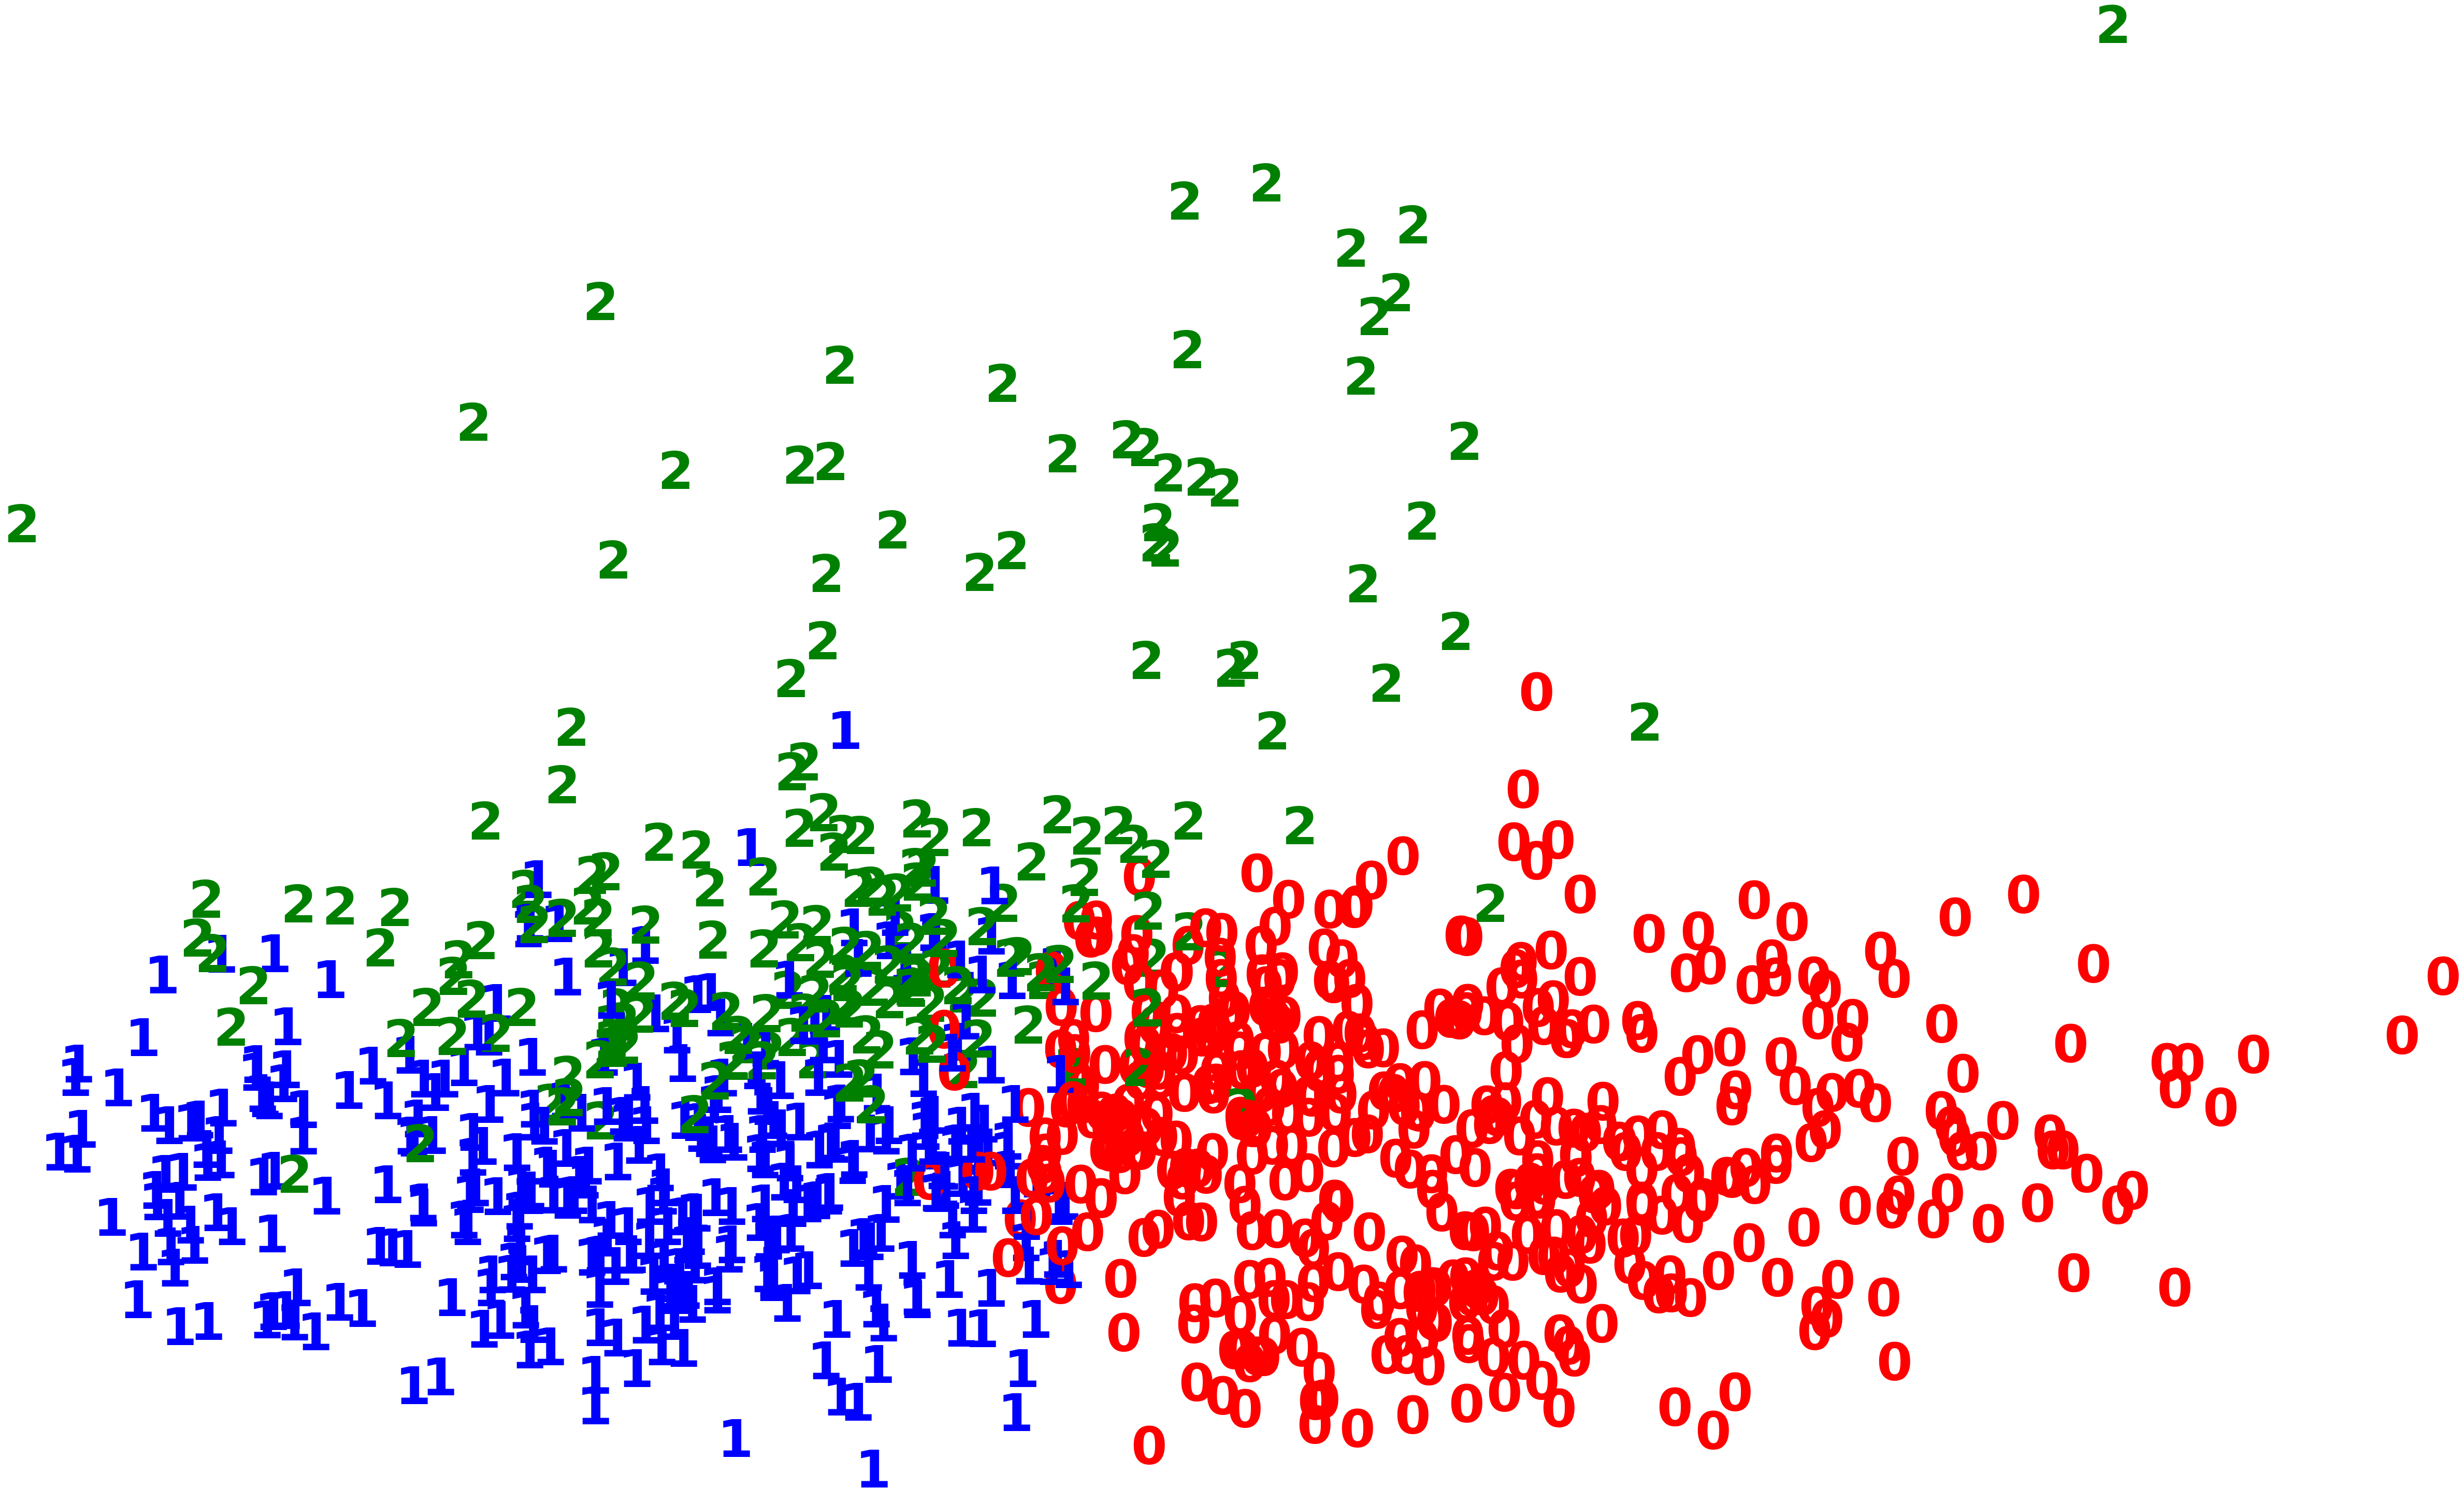

In [73]:
#Define KMeans model and fit
labels = KMeans(n_clusters = 3, random_state = 1).fit_predict(X_std)

#Plotting the predictions and the actual values
pca = PCA(n_components= 12).fit_transform(X_std)


plt.figure(figsize = (10,5))
colors = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(labels[i]),
             color = colors[labels[i]],
             fontdict = {'weight': 'bold', 'size': 100}
            )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()


Using PCA to reduce the data to three dimensions, we can see the clusters via K-means are separated, but not very well with overlap between them.

In [74]:
pd.crosstab(y, labels)

col_0       0    1   2
DEALSIZE              
0          53  285  97
1         350   66  89
2          53    0  11

In [116]:
print("Adjusted Rand Index of the K-means Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, labels)))
print("Silhouette score of the K-means Clustering solution: {}".format(
    metrics.silhouette_score(X_std, labels)))

Adjusted Rand Index of the K-means Clustering solution: 0.35990180918952686
Silhouette score of the K-means Clustering solution: 0.11134890411050438


## Linkage Method for Agglomerative Clustering Tuning

In [76]:
linkage_methods = ["ward", "average", "complete"]

# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="average", 
                                      affinity='cosine',
                                      n_clusters=3)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

print("ARI score of linkage method average: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score of linkage method average: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean', sample_size = 1000)))
print("------------------------------------------------")

# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="complete", 
                                      affinity='cosine',
                                      n_clusters=3)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

print("ARI score of linkage method complete: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score of linkage method complete: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean', sample_size = 1000)))
print("------------------------------------------------")

# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="ward", 
                                      affinity='euclidean',
                                      n_clusters=3)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

print("ARI score of linkage method ward: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score of linkage method ward: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean', sample_size = 1000)))

ARI score of linkage method average: 0.034825720441635066
Silhouette score of linkage method average: 0.09102757891037021
------------------------------------------------
ARI score of linkage method complete: 0.026884996897482572
Silhouette score of linkage method complete: 0.06748780701259946
------------------------------------------------
ARI score of linkage method ward: 0.04347133007542385
Silhouette score of linkage method ward: 0.10259811339139477


According to the results, the best scores are achieved by the linkage method ward. The ARI and silhouette scores of the three Agglomerative Cluster  was 0.0435 and 0.1027 respectively.

## Hierarchical Clustering
Three Clusters

Hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or splitting them successively.

Linkage Ward minimizes the sum of squared differences with all clusters.

In [77]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=3).fit_predict(X_std)


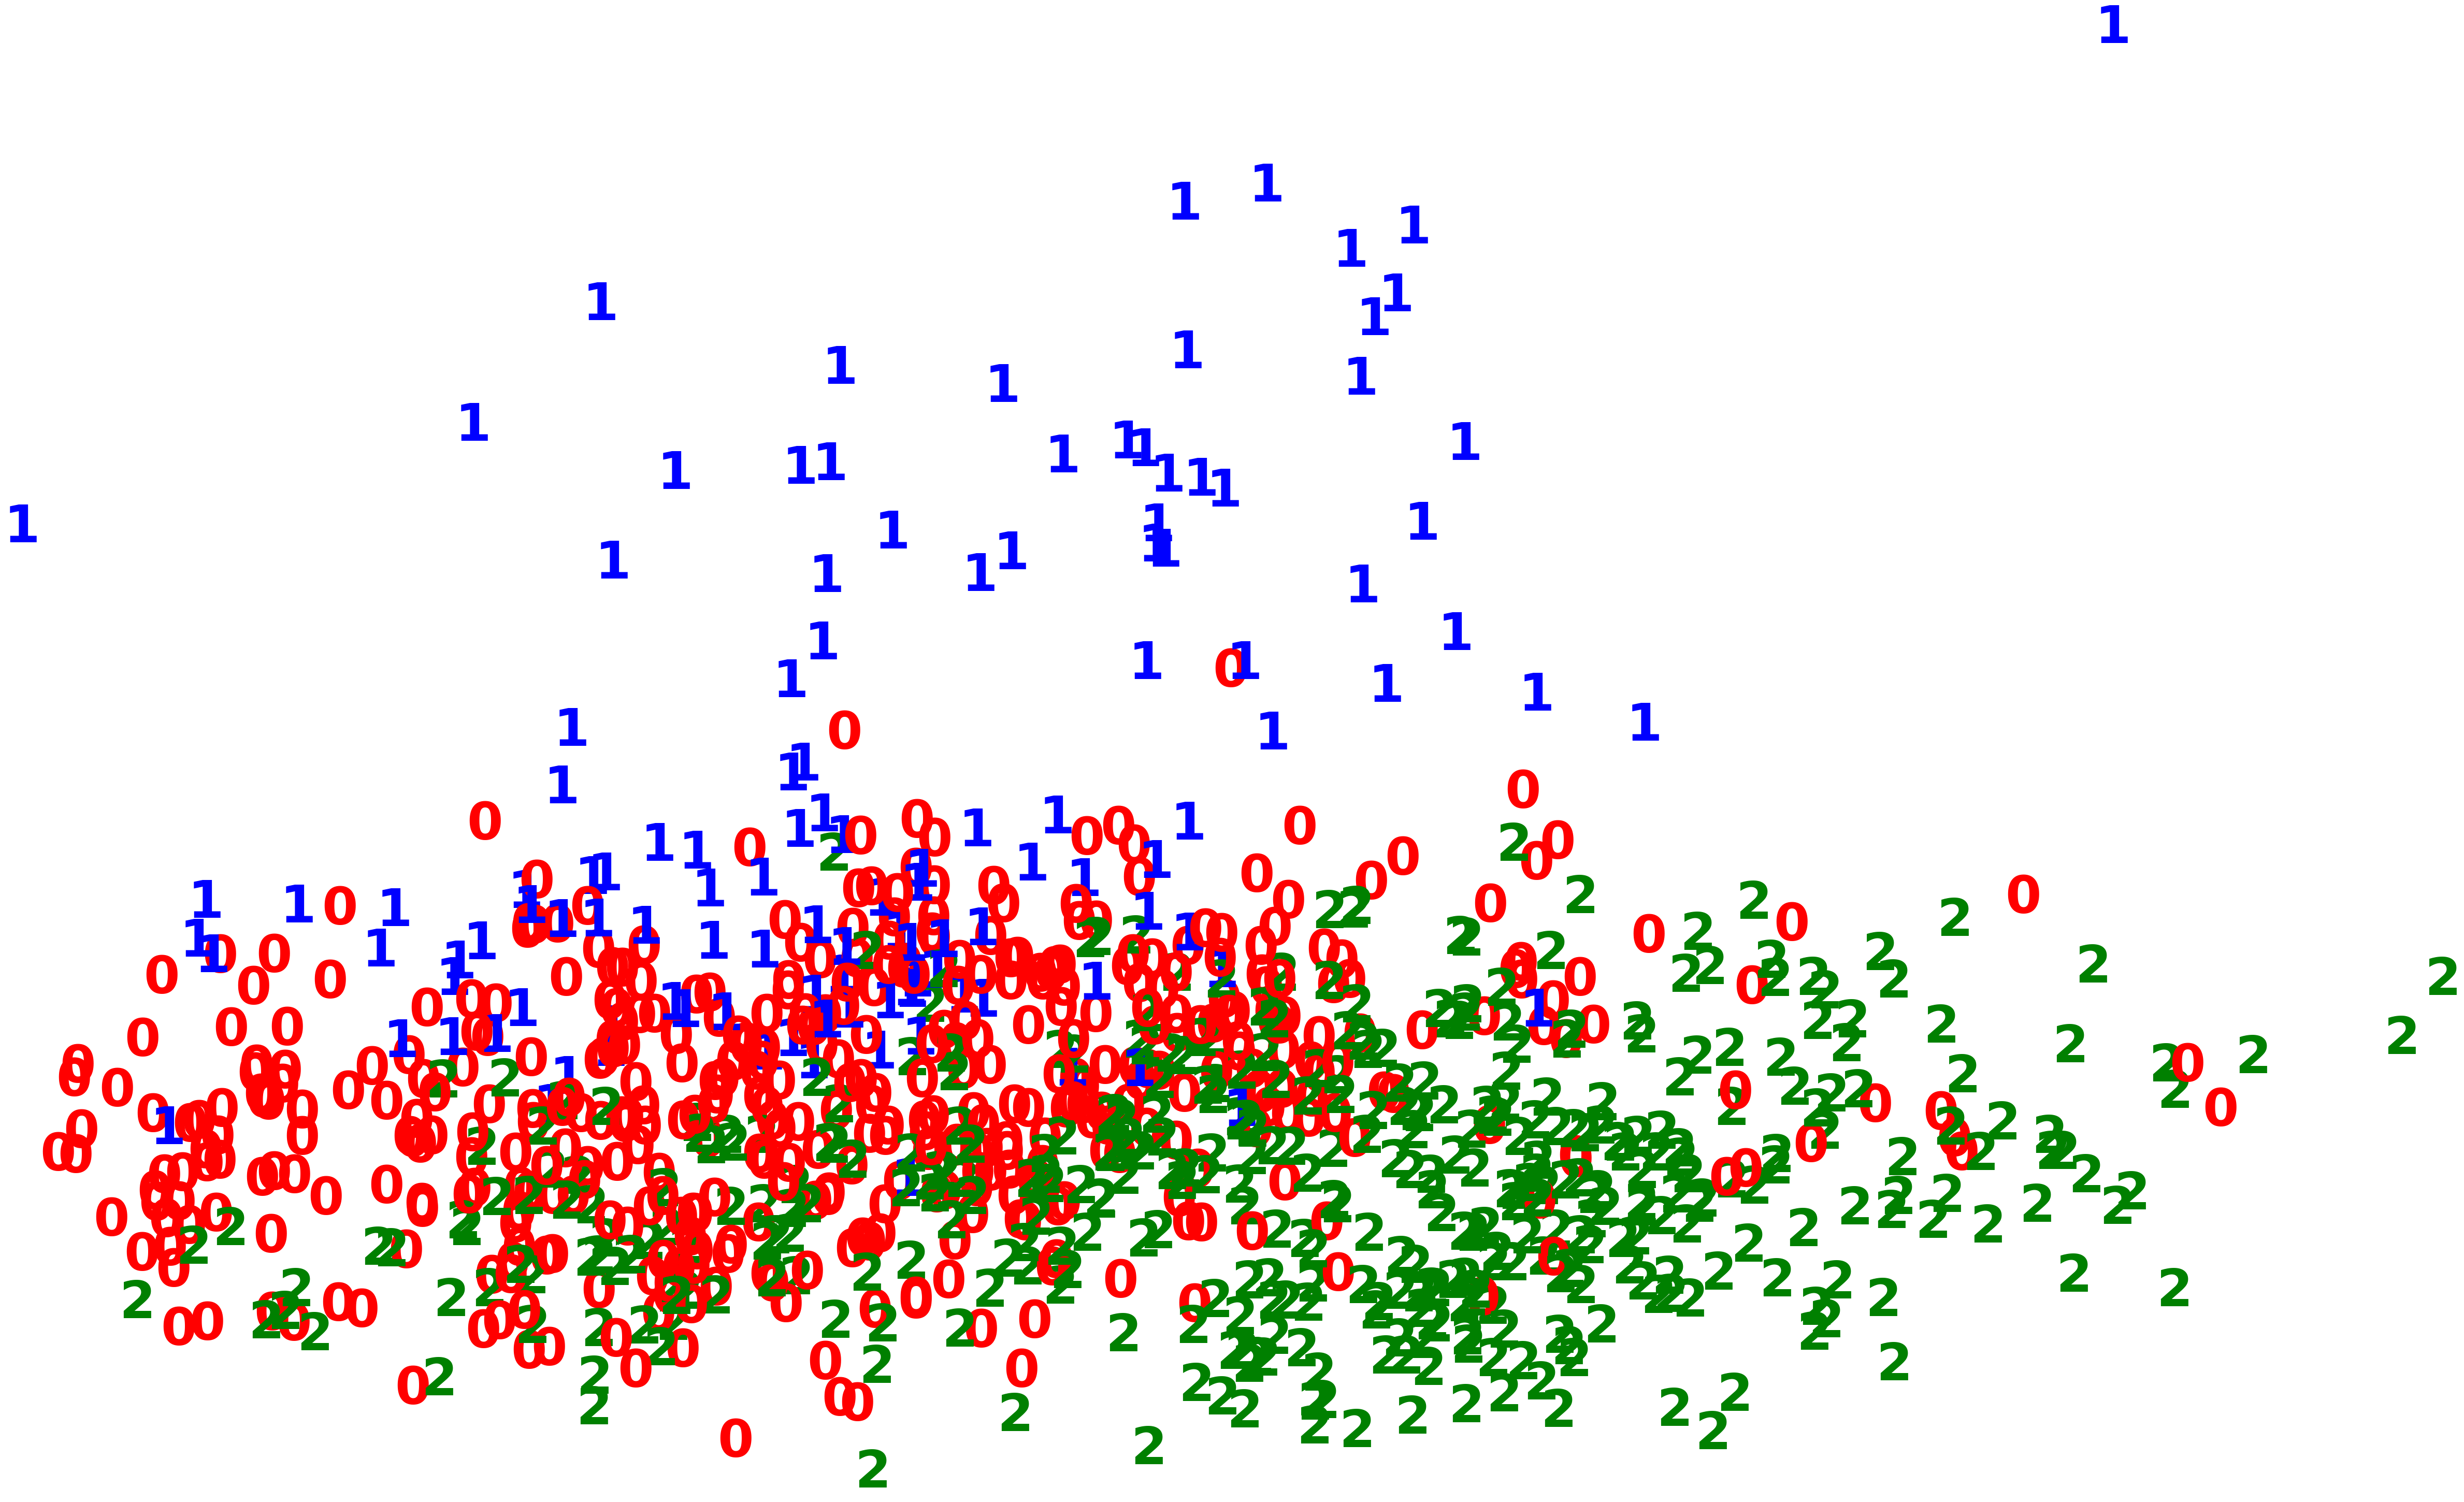

In [78]:
#Plotting the predictions and the actual values
pca = PCA(n_components=12).fit_transform(X_std)


plt.figure(figsize = (10,5))
colors = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(agg_cluster[i]),
             color = colors[agg_cluster[i]],
             fontdict = {'weight': 'bold', 'size': 100}
            )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Using PCA to reduce the data to three dimensions, we can see the clusters via Hierarchical Clustering are very much overlapped and are not separated well. 

In [79]:
pd.crosstab(y, agg_cluster)


col_0       0   1    2
DEALSIZE              
0         254  55  126
1         197  57  251
2          10  12   42

In [115]:
print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, agg_cluster)))
print("Silhouette score of the Agglomerative Clustering solution: {}".format(
    metrics.silhouette_score(X_std, agg_cluster)))

Adjusted Rand Index of the Agglomerative Clustering solution: 0.010565960300657888
Silhouette score of the Agglomerative Clustering solution: 0.1912584272099419


## Gaussian Mixture
Three Clusters

Gaussian mixture can be considered as generalizing K-Means clustering to incorporate information about the structure as well as centers of the gaussians. 

In [81]:
from sklearn.mixture import GaussianMixture

In [82]:
# Defining the agglomerative clustering and fit model
gmm_cluster = GaussianMixture(n_components=3, random_state=1).fit_predict(X_std)

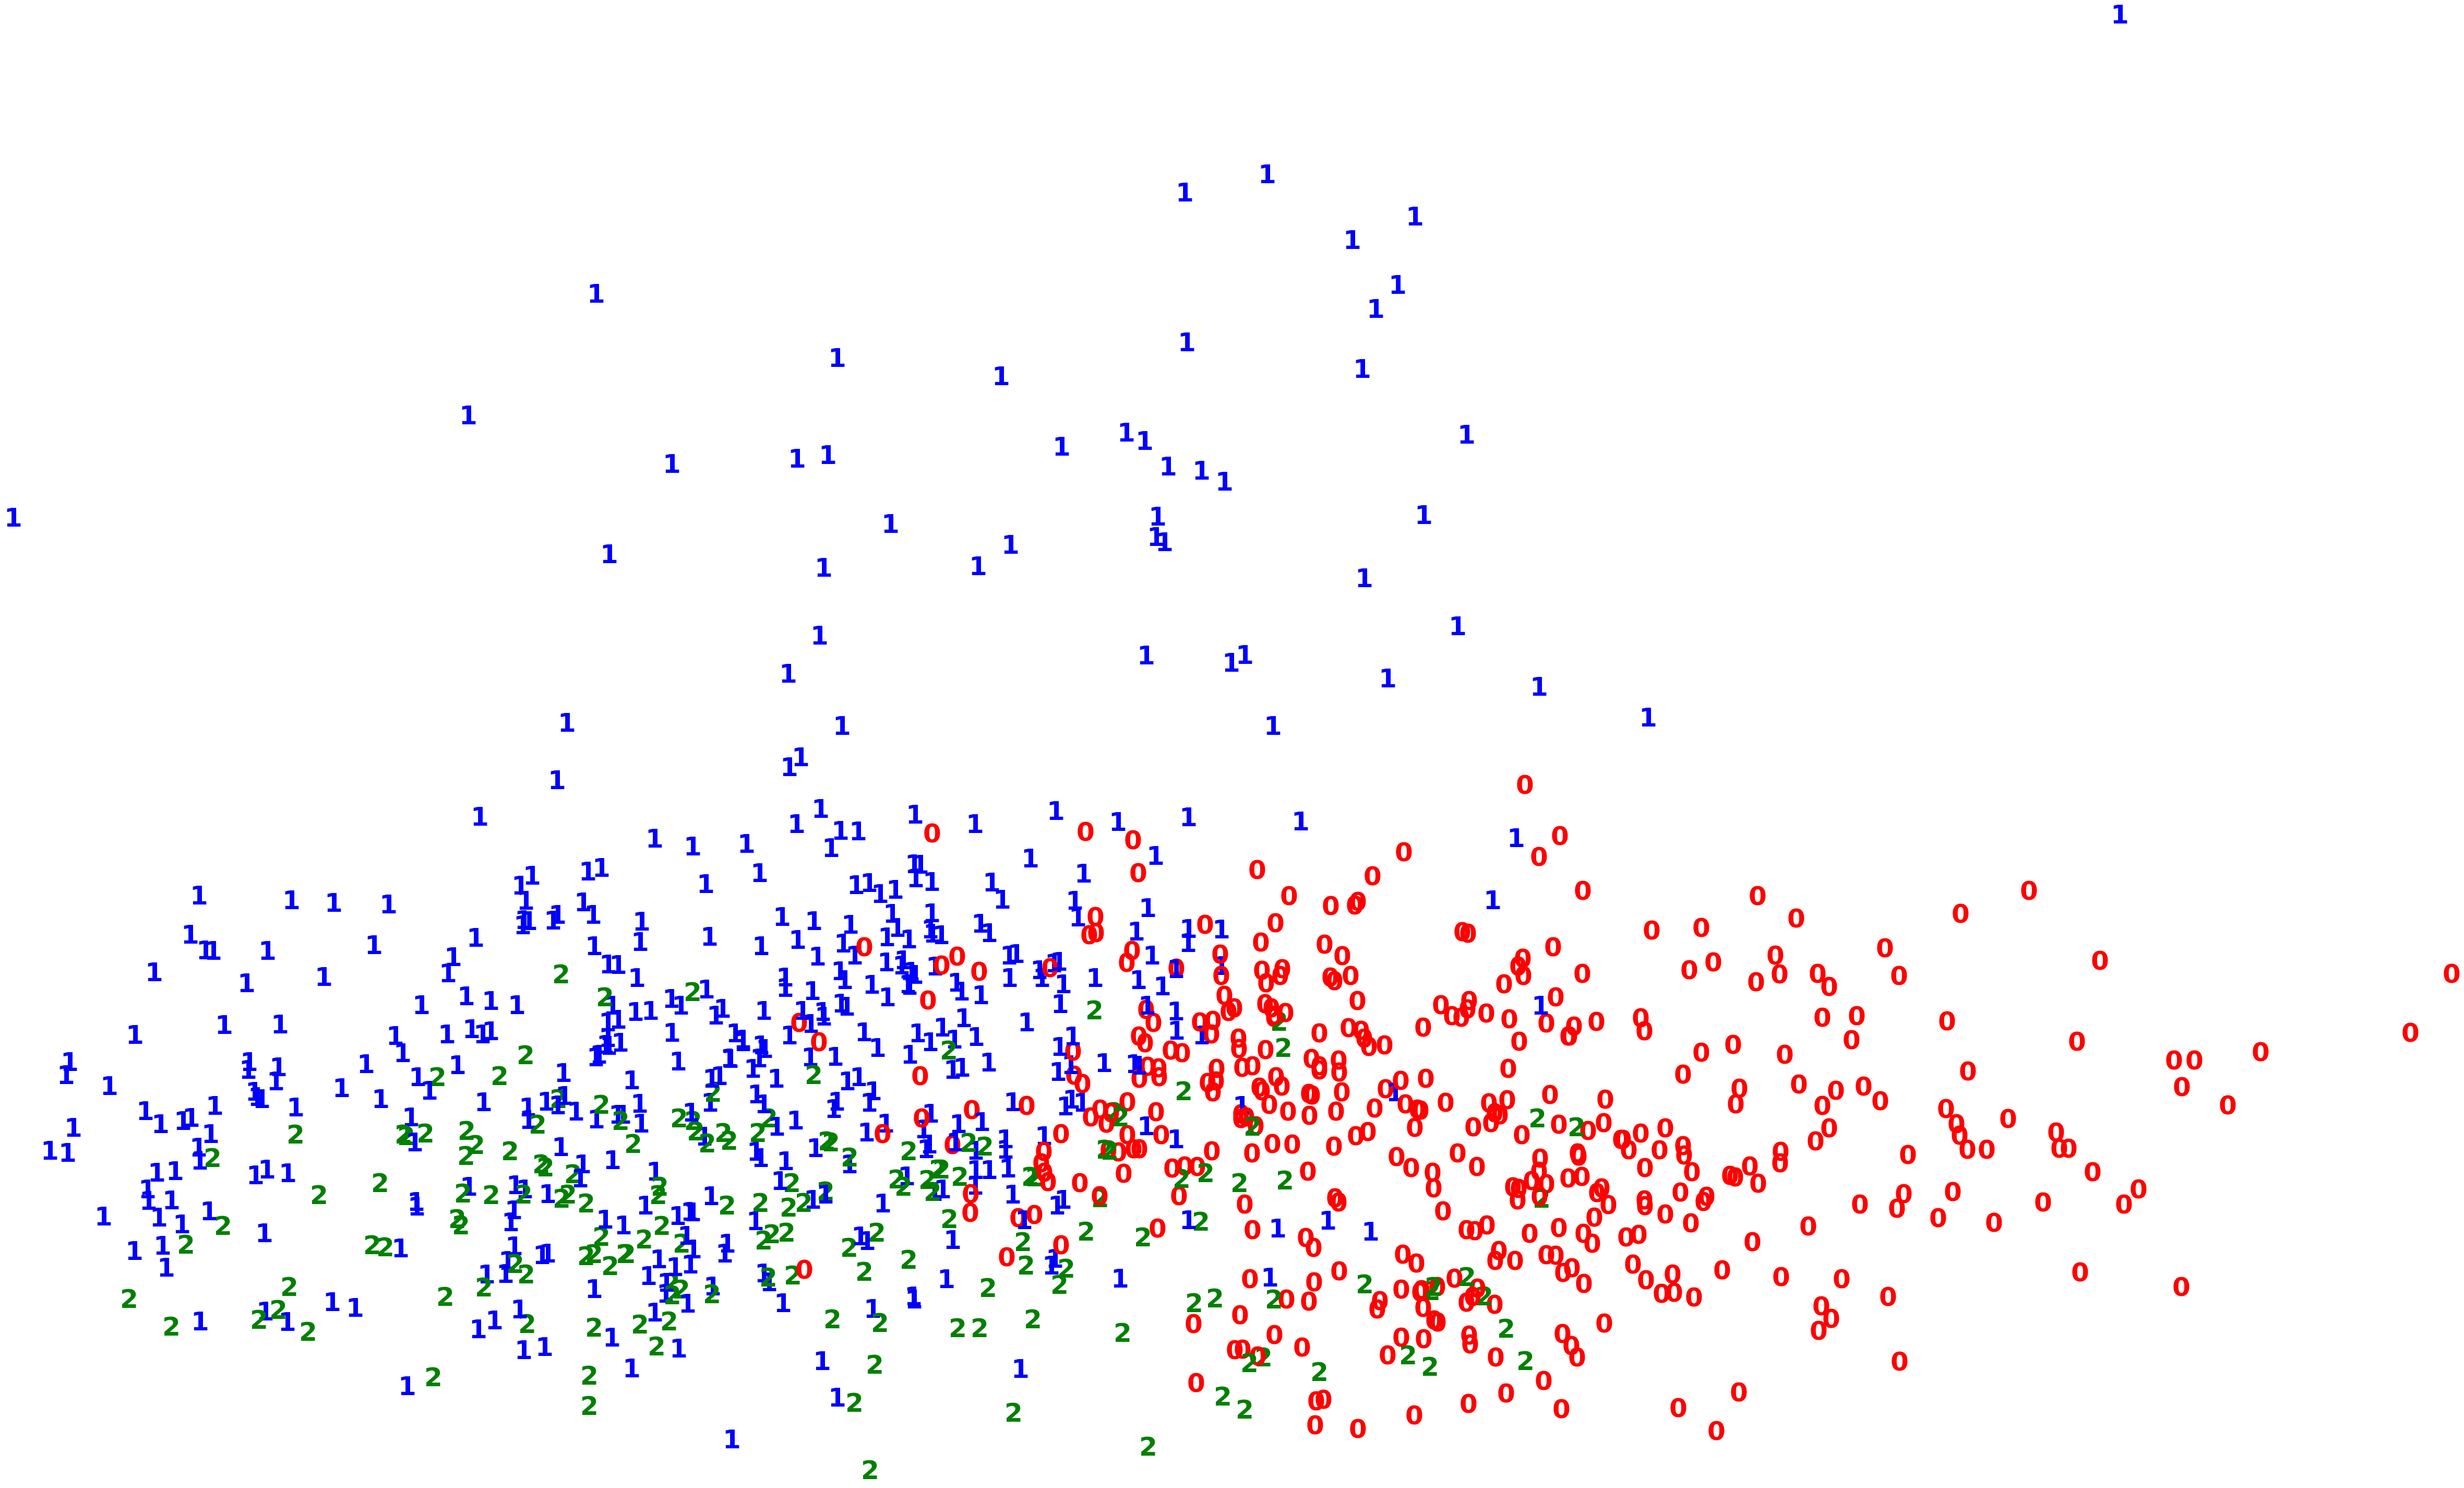

In [83]:
pca = PCA(n_components=3).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(gmm_cluster[i]),
             color=colours[int(gmm_cluster[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [84]:
pd.crosstab(y, gmm_cluster)

col_0       0    1    2
DEALSIZE               
0          39  272  124
1         305  159   41
2          52   12    0

In [114]:
print("Adjusted Rand Index of the Gaussian Mixture Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, gmm_cluster)))
print("Silhouette score of the Gaussian Mixture Clustering solution: {}".format(
    metrics.silhouette_score(X_std, gmm_cluster)))

Adjusted Rand Index of the Gaussian Mixture Clustering solution: 0.20963508354303206
Silhouette score of the Gaussian Mixture Clustering solution: 0.09741948680256893


## Tune Gaussian Mixture

In [86]:
# Defining the Gaussian Mixture
gmm_cluster_full = GaussianMixture(n_components=3, random_state=1, covariance_type="full")

# Fit model
y_pred_full = gmm_cluster_full.fit_predict(X_std)

print("ARI score with covariance_type=full: {}".format(
    metrics.adjusted_rand_score(y, y_pred_full)))

print("Silhouette score with covariance_type=full: {}".format(
    metrics.silhouette_score(X_std, y_pred_full, metric='euclidean')))
print("------------------------------------------------------")
# Defining the Gaussian Mixture
gmm_cluster_tied = GaussianMixture(n_components=3, random_state=1, covariance_type="tied")

# Fit model
y_pred_tied = gmm_cluster_tied.fit_predict(X_std)

print("ARI score with covariance_type=tied: {}".format(
    metrics.adjusted_rand_score(y, y_pred_tied)))

print("Silhouette score with covariance_type=tied: {}".format(
    metrics.silhouette_score(X_std, y_pred_tied, metric='euclidean')))
print("------------------------------------------------------")

# Defining the Gaussian Mixture
gmm_cluster_diag = GaussianMixture(n_components=3, random_state=1, covariance_type="diag")

# Fit model
y_pred_diag = gmm_cluster_diag.fit_predict(X_std)

print("ARI score with covariance_type=diag: {}".format(
    metrics.adjusted_rand_score(y, y_pred_diag)))

print("Silhouette score with covariance_type=diag: {}".format(
    metrics.silhouette_score(X_std, y_pred_diag, metric='euclidean')))
print("------------------------------------------------------")


# Defining the Gaussian Mixture
gmm_cluster_spher = GaussianMixture(n_components=3, random_state=1, covariance_type="spherical")

# Fit model
y_pred_spher = gmm_cluster_spher.fit_predict(X_std)

print("ARI score with covariance_type=spherical: {}".format(
    metrics.adjusted_rand_score(y, y_pred_spher)))

print("Silhouette score with covariance_type=spherical: {}".format(
    metrics.silhouette_score(X_std, y_pred_spher, metric='euclidean')))
print("------------------------------------------------------")

ARI score with covariance_type=full: 0.1806306876403323
Silhouette score with covariance_type=full: 0.08860046369104238
------------------------------------------------------
ARI score with covariance_type=tied: 0.21175332395670263
Silhouette score with covariance_type=tied: 0.13080507525379184
------------------------------------------------------
ARI score with covariance_type=diag: 0.18485298208911394
Silhouette score with covariance_type=diag: 0.0809750359913015
------------------------------------------------------
ARI score with covariance_type=spherical: 0.24889901715107343
Silhouette score with covariance_type=spherical: 0.10236637950944902
------------------------------------------------------


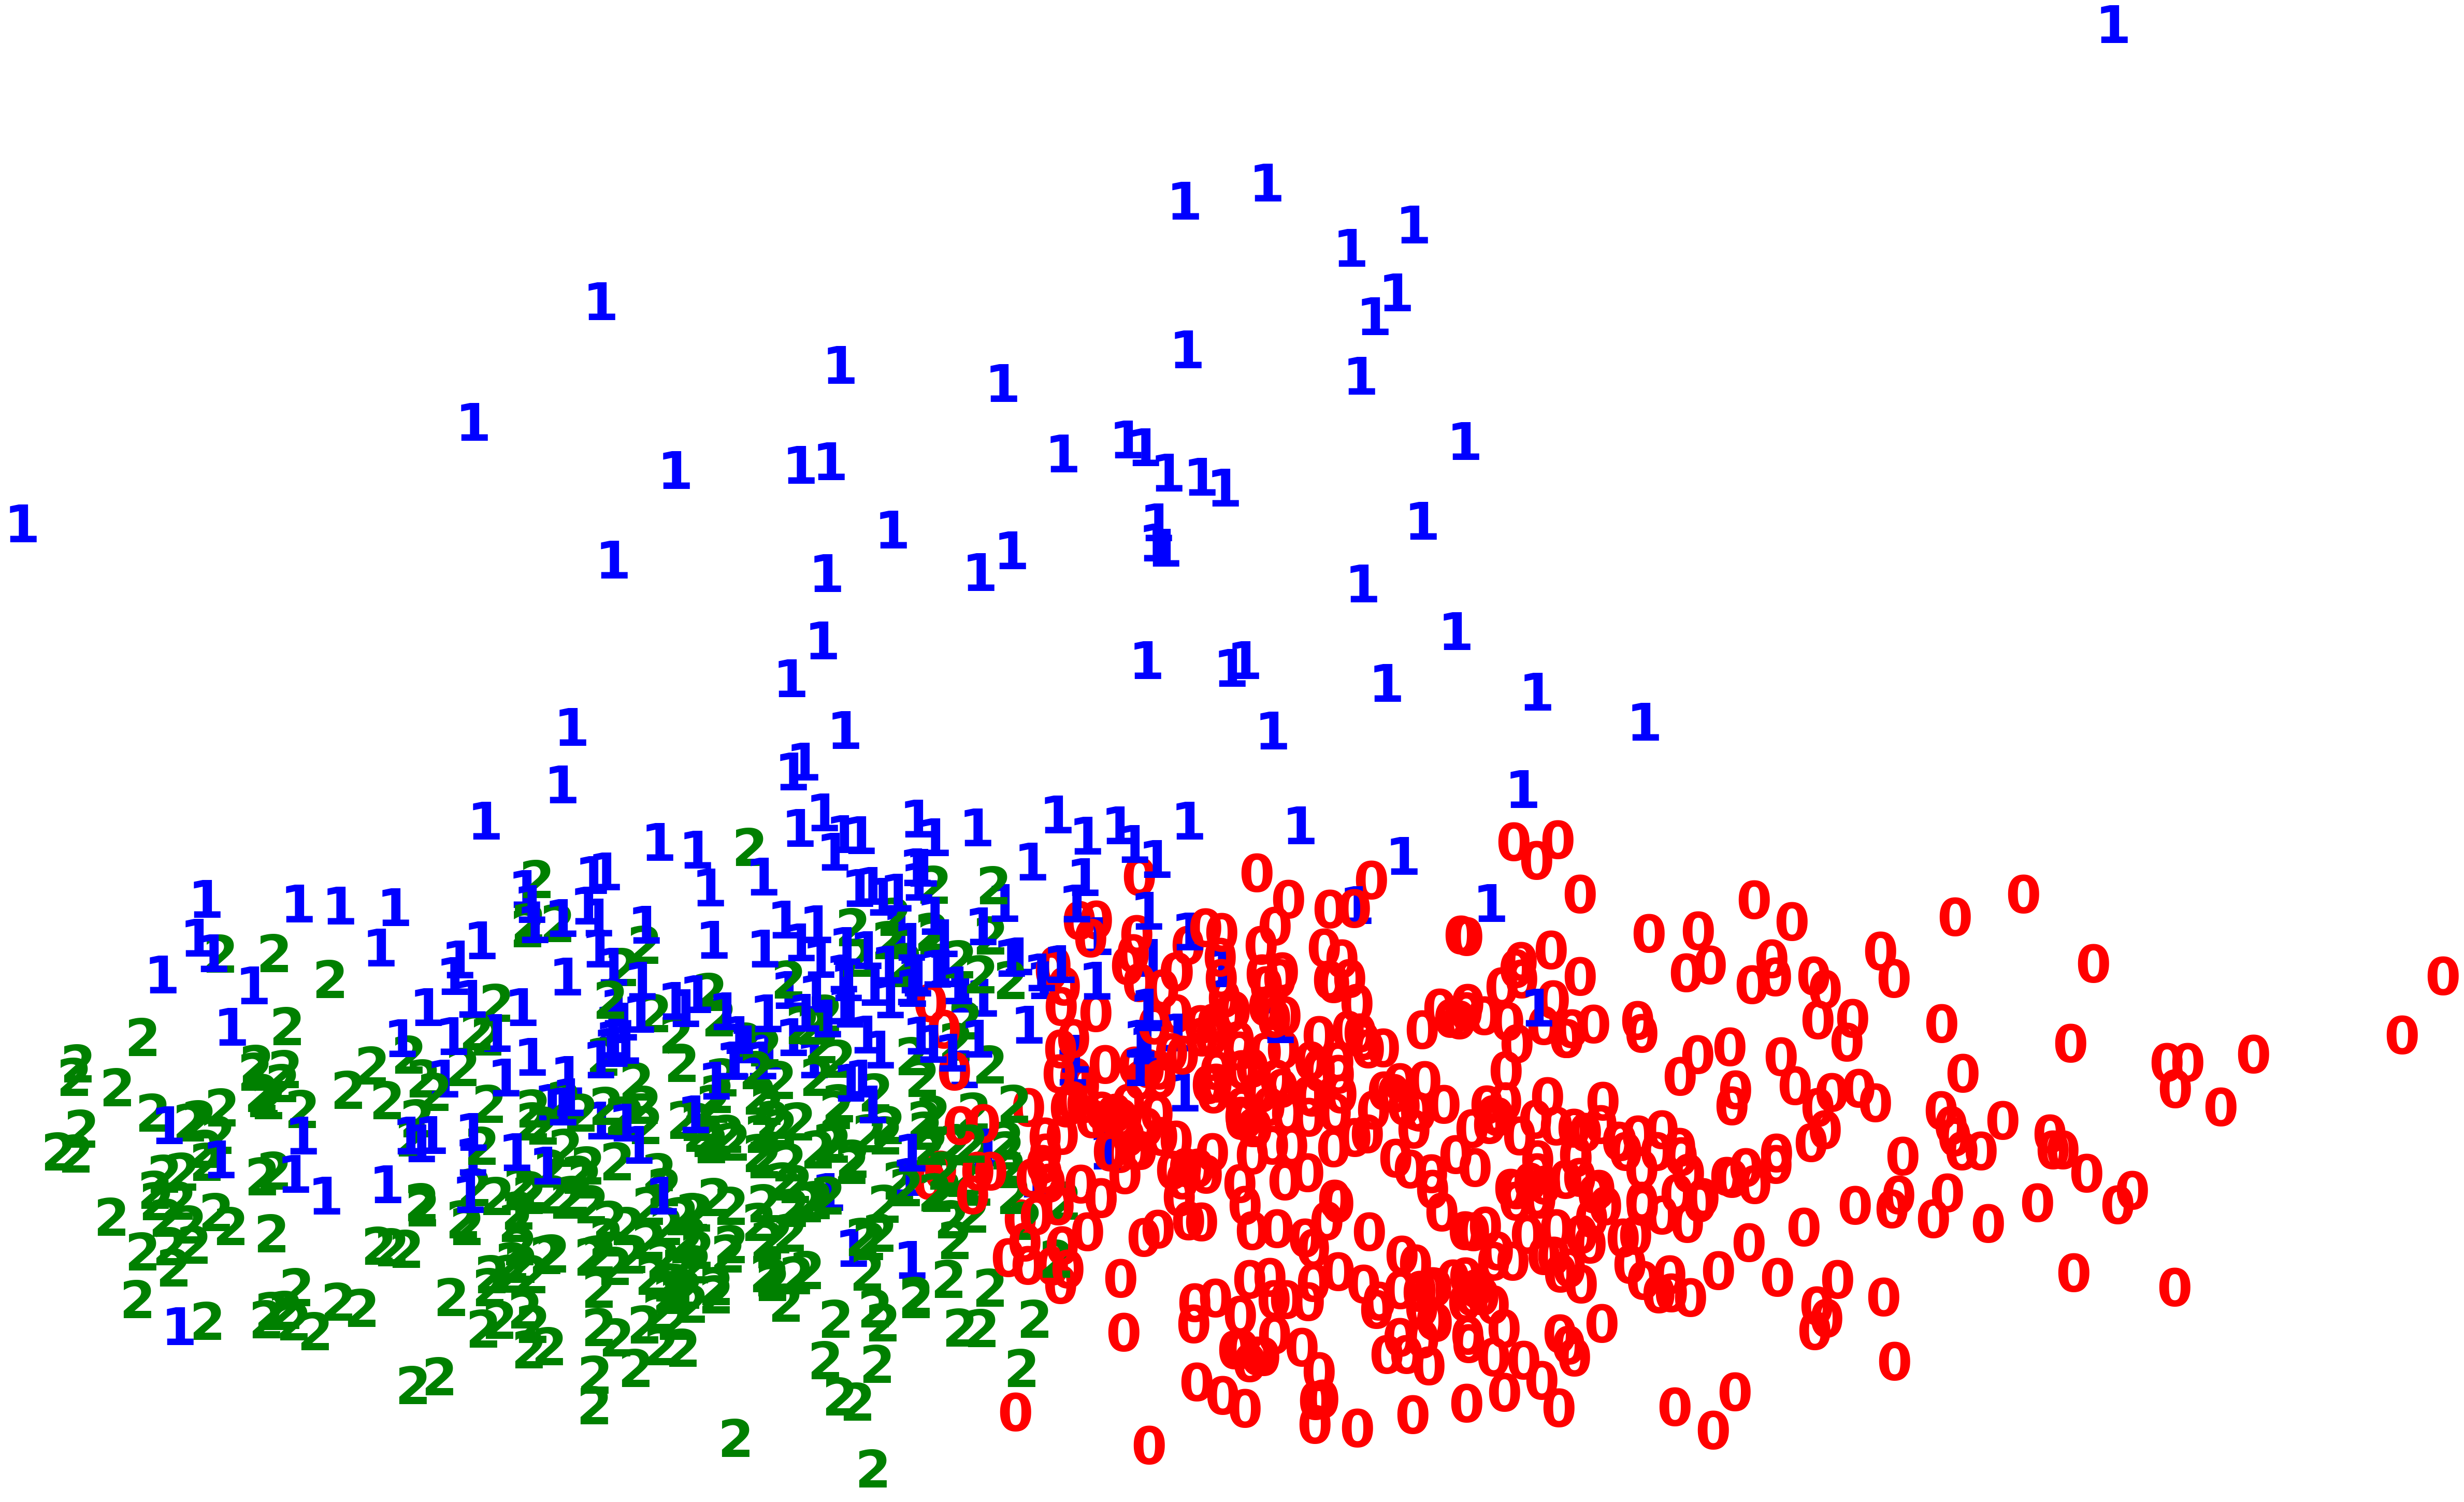

In [87]:
gmm_cluster_sp = GaussianMixture(n_components=3, covariance_type = 'spherical', random_state=1).fit_predict(X_std)
# Fit model

pca = PCA(n_components=12).fit_transform(X_std)

plt.figure(figsize = (10,5))
colors = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(gmm_cluster_sp[i]),
             color = colors[gmm_cluster_sp[i]],
             fontdict = {'weight': 'bold', 'size': 100}
            )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()


In [88]:
pd.crosstab(y, gmm_cluster_sp)

col_0       0    1    2
DEALSIZE               
0          57  123  255
1         349  103   53
2          50   14    0

In [118]:
print("Adjusted Rand Index of the Gaussian Mixture Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, gmm_cluster_sp)))
print("Silhouette score of the Gaussian Mixture Clustering solution: {}".format(
    metrics.silhouette_score(X_std, gmm_cluster_sp)))

Adjusted Rand Index of the Gaussian Mixture Clustering solution: 0.24889901715107343
Silhouette score of the Gaussian Mixture Clustering solution: 0.10236637950944902


Using PCA to reduce the data to three dimensions, we can see the clusters via Gaussian Mixture are separated, but not very well with overlap between them.

## DBSCAN
Three Clusters

DBBSCAN is the concept of non-core samples close to the core samples that are in areas of high density. 

In [92]:
from sklearn.cluster import DBSCAN

In [93]:
set(clusters)

{0, 1, 2}

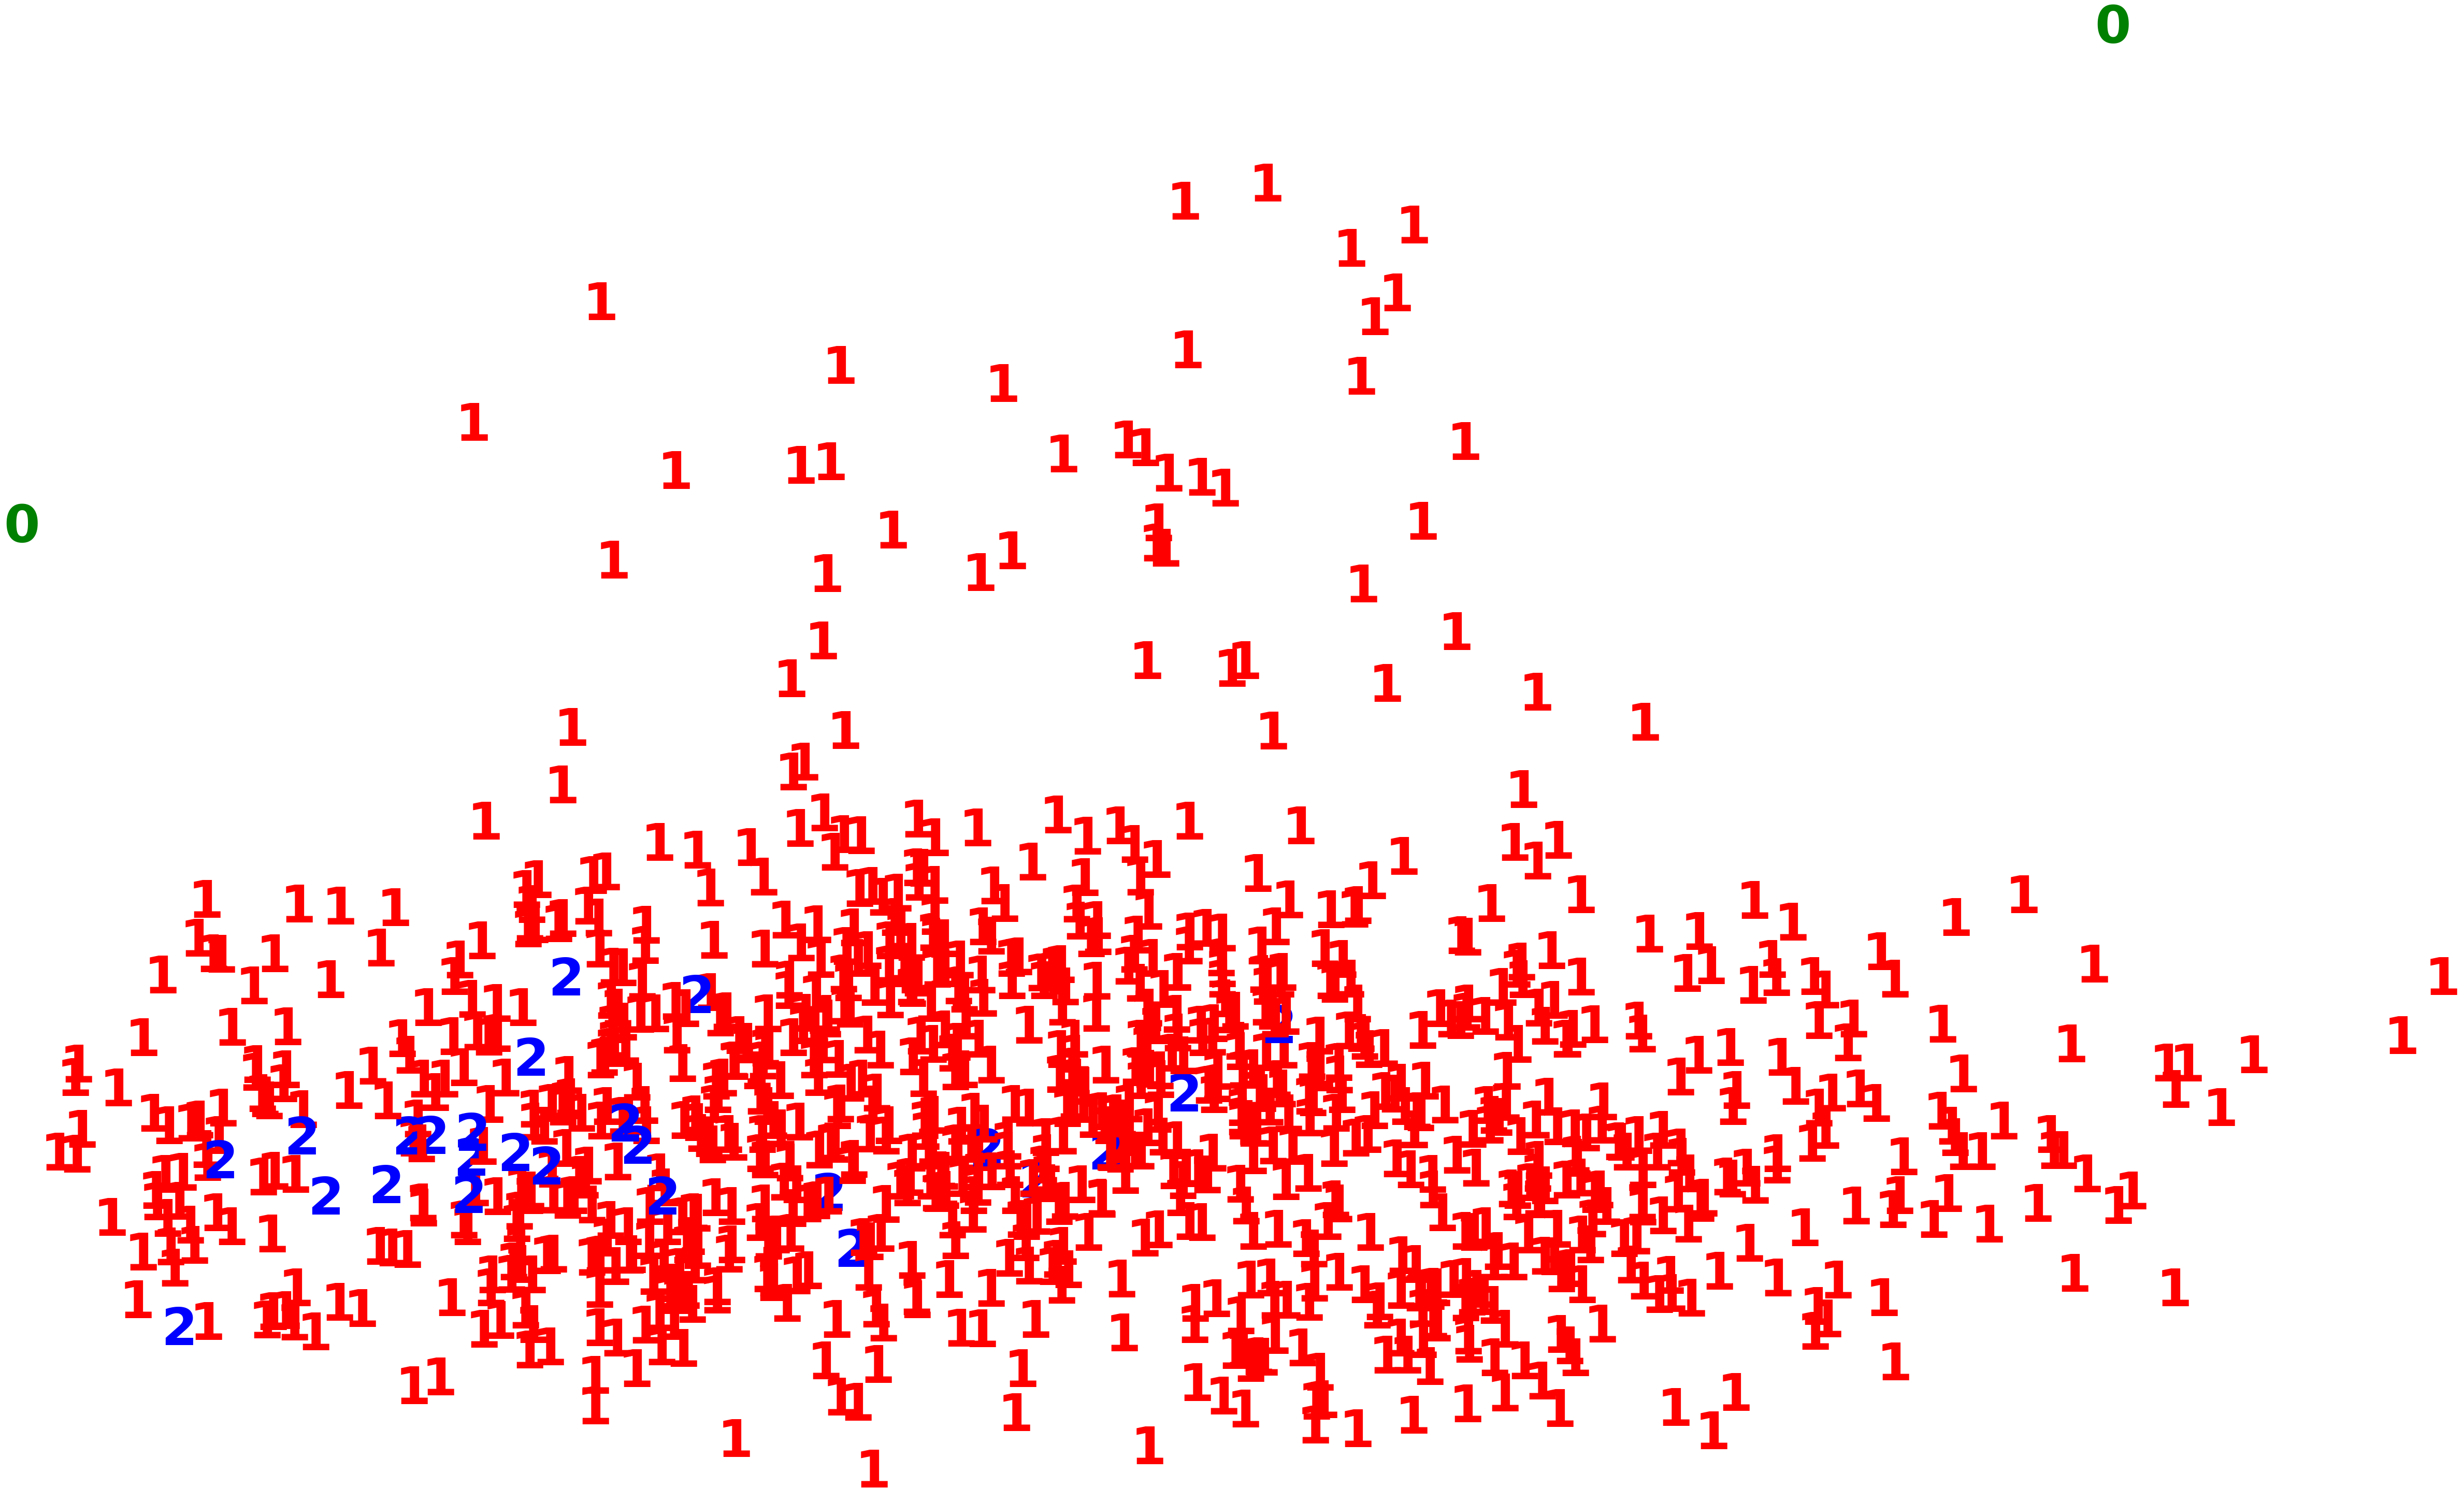

In [94]:
dbscan_cluster = DBSCAN(eps=4, metric="euclidean")

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

pca = PCA(n_components=12).fit_transform(X_std)

plt.figure(figsize = (10,5))
colors = 'rbgrg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]+1),
             color = colors[clusters[i]],
             fontdict = {'weight': 'bold', 'size': 100})

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()




Unfortunately the DBSCAN above doesn't help cluster our data. This could be to the non-core samples being too close to a common core sample.

In [121]:
pd.crosstab(y, clusters)

col_0     -1    0   1
DEALSIZE             
0          1  417  17
1          0  497   8
2          1   63   0

In [123]:
print("Adjusted Rand Index of the DBSCAN Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("Silhouette score of the DBSCAN Clustering solution: {}".format(
    metrics.silhouette_score(X_std, clusters)))

Adjusted Rand Index of the DBSCAN Clustering solution: 0.001289172253379183
Silhouette score of the DBSCAN Clustering solution: 0.3298459740762919


## TSNE

TSNE is a non-linear method of dimensionality reduction 

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1004 samples in 0.001s...
[t-SNE] Computed neighbors for 1004 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1004
[t-SNE] Computed conditional probabilities for sample 1004 / 1004
[t-SNE] Mean sigma: 0.002178
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.446625
[t-SNE] KL divergence after 300 iterations: 0.780411


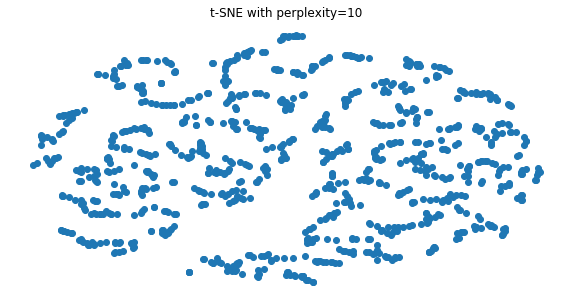

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 1004 samples in 0.001s...
[t-SNE] Computed neighbors for 1004 samples in 0.020s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1004
[t-SNE] Computed conditional probabilities for sample 1004 / 1004
[t-SNE] Mean sigma: 0.003184
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.273239
[t-SNE] KL divergence after 300 iterations: 0.623803


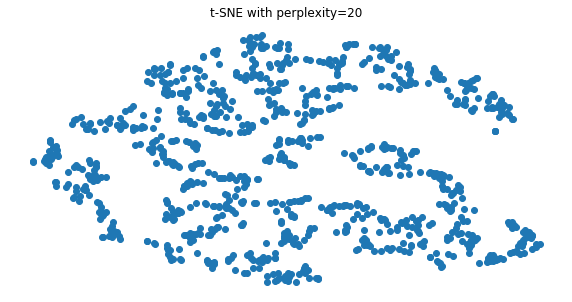

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1004 samples in 0.001s...
[t-SNE] Computed neighbors for 1004 samples in 0.025s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1004
[t-SNE] Computed conditional probabilities for sample 1004 / 1004
[t-SNE] Mean sigma: 0.003943
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.279438
[t-SNE] KL divergence after 300 iterations: 0.539108


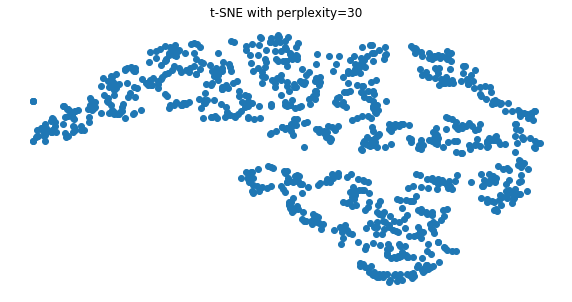

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1004 samples in 0.001s...
[t-SNE] Computed neighbors for 1004 samples in 0.031s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1004
[t-SNE] Computed conditional probabilities for sample 1004 / 1004
[t-SNE] Mean sigma: 0.004590
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.790352
[t-SNE] KL divergence after 300 iterations: 0.477872


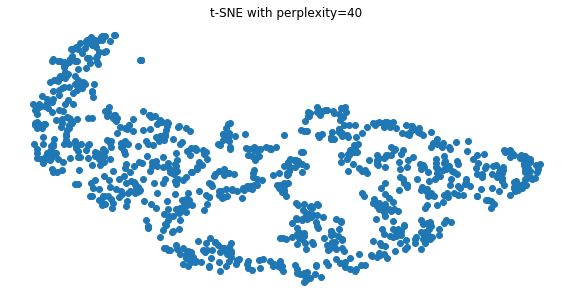

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1004 samples in 0.001s...
[t-SNE] Computed neighbors for 1004 samples in 0.037s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1004
[t-SNE] Computed conditional probabilities for sample 1004 / 1004
[t-SNE] Mean sigma: 0.005173
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.578480
[t-SNE] KL divergence after 300 iterations: 0.429507


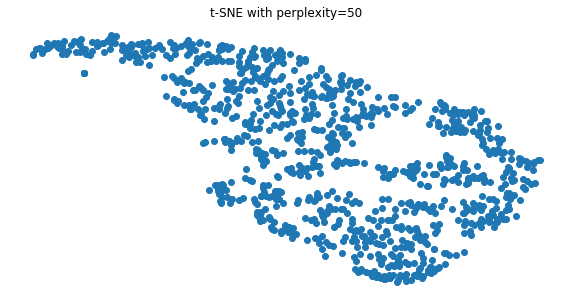

[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 1004 samples in 0.001s...
[t-SNE] Computed neighbors for 1004 samples in 0.046s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1004
[t-SNE] Computed conditional probabilities for sample 1004 / 1004
[t-SNE] Mean sigma: 0.005711
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.448109
[t-SNE] KL divergence after 300 iterations: 0.386630


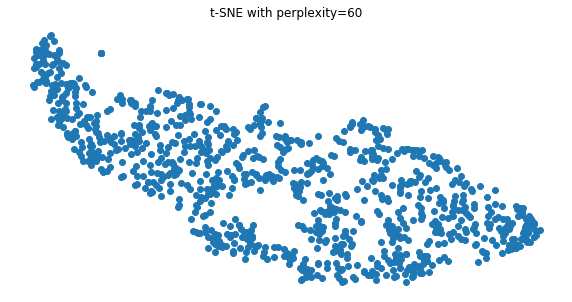

[t-SNE] Computing 211 nearest neighbors...
[t-SNE] Indexed 1004 samples in 0.001s...
[t-SNE] Computed neighbors for 1004 samples in 0.048s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1004
[t-SNE] Computed conditional probabilities for sample 1004 / 1004
[t-SNE] Mean sigma: 0.006216
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.452888
[t-SNE] KL divergence after 300 iterations: 0.378437


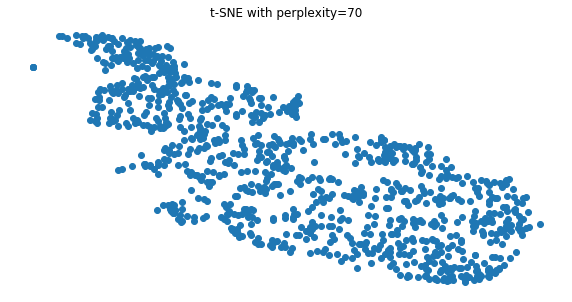

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 1004 samples in 0.001s...
[t-SNE] Computed neighbors for 1004 samples in 0.060s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1004
[t-SNE] Computed conditional probabilities for sample 1004 / 1004
[t-SNE] Mean sigma: 0.006694
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.539330
[t-SNE] KL divergence after 300 iterations: 0.366611


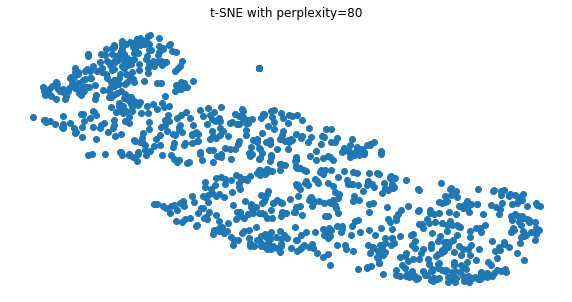

[t-SNE] Computing 271 nearest neighbors...
[t-SNE] Indexed 1004 samples in 0.001s...
[t-SNE] Computed neighbors for 1004 samples in 0.059s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1004
[t-SNE] Computed conditional probabilities for sample 1004 / 1004
[t-SNE] Mean sigma: 0.007153
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.762398
[t-SNE] KL divergence after 300 iterations: 0.346125


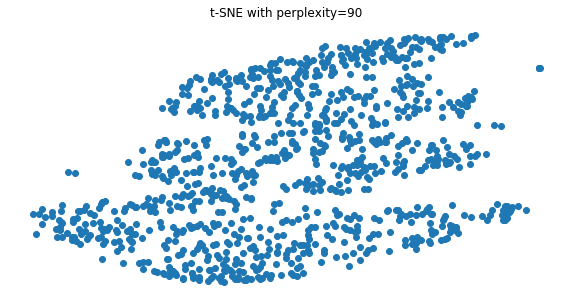

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 1004 samples in 0.001s...
[t-SNE] Computed neighbors for 1004 samples in 0.067s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1004
[t-SNE] Computed conditional probabilities for sample 1004 / 1004
[t-SNE] Mean sigma: 0.007596
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.038589
[t-SNE] KL divergence after 300 iterations: 0.272140


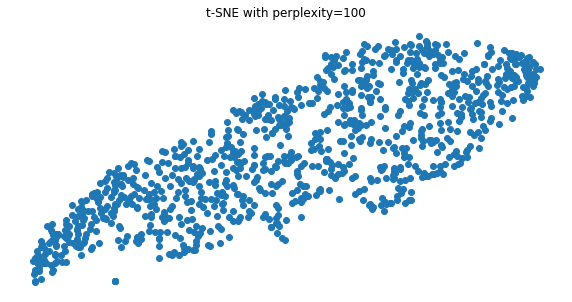

In [95]:
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(10,110,10):
    tsne = TSNE(n_components=2, verbose=1, perplexity=i, n_iter=300)
    tsne_results = tsne.fit_transform(X_norm)
    plt.figure(figsize=(10,5))
    plt.title("t-SNE with perplexity={}".format(i))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()


Looks as if t-SNE with perplexity 80 shows the separation the best, although still not very clear.


All the different configurations of perplexity achieves suboptimal results than PCA, however choosing one of them isn't that easy by just looking at unlabeled and uncolored graphs.

## UMAP

UMAP is a non-linear method of dimensionality reduction 

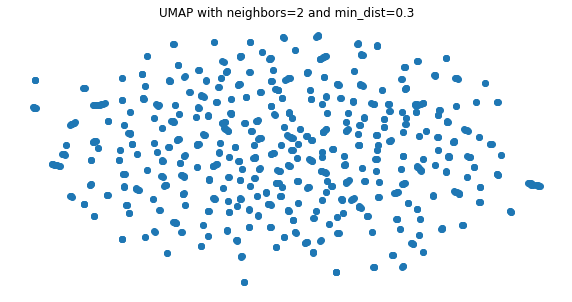

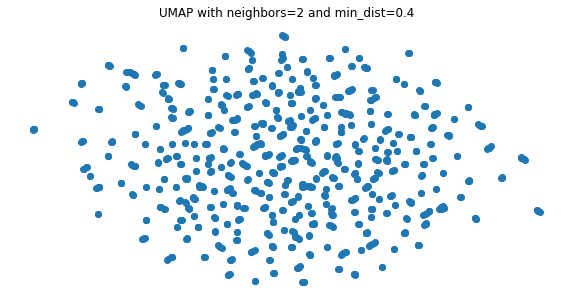

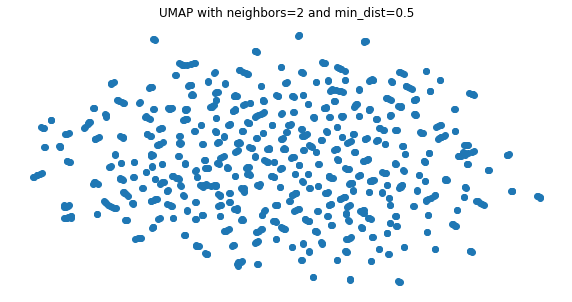

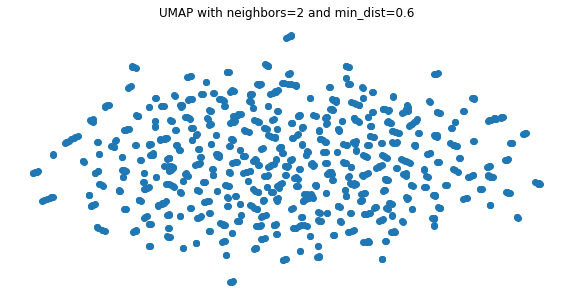

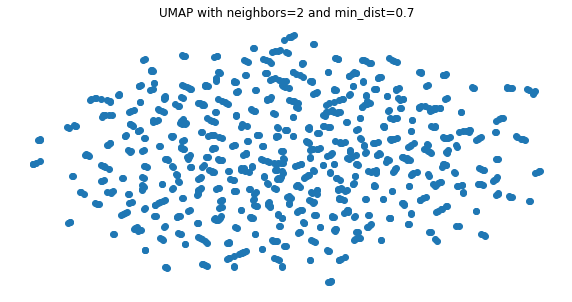

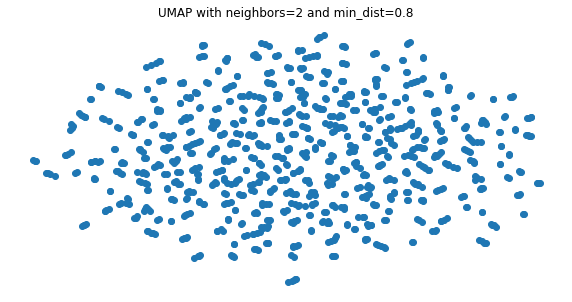

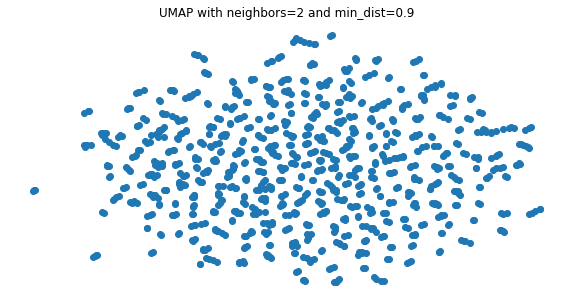

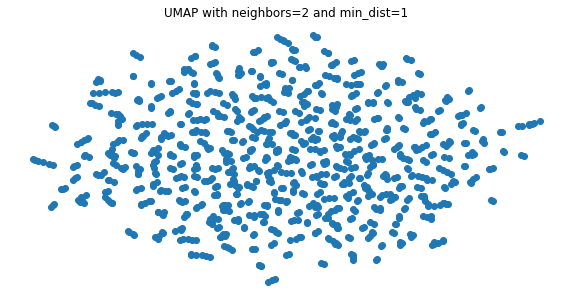

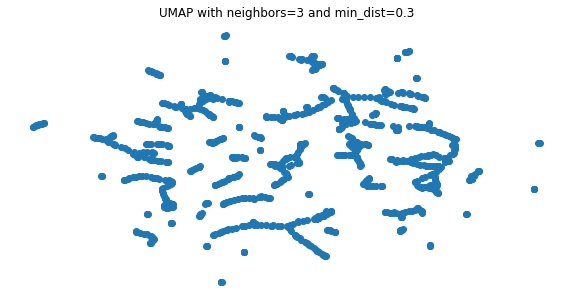

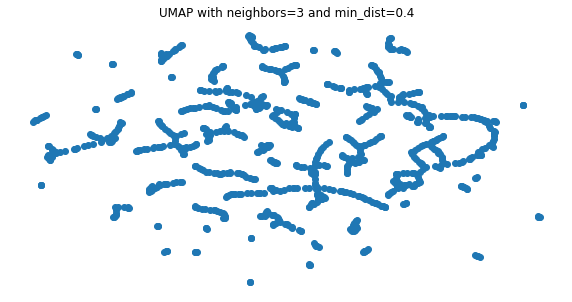

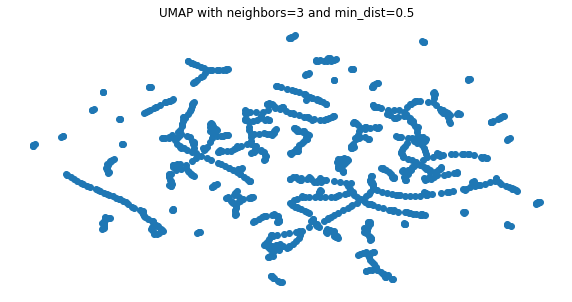

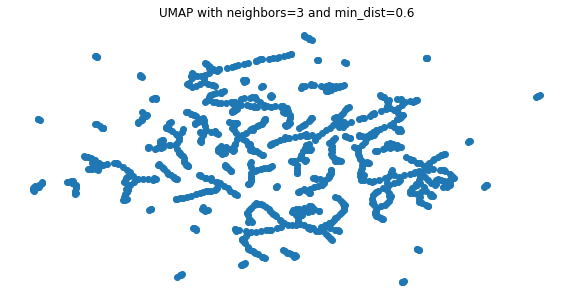

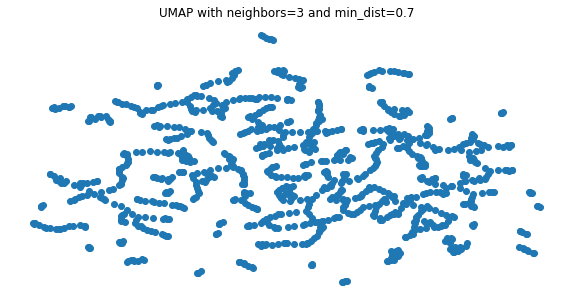

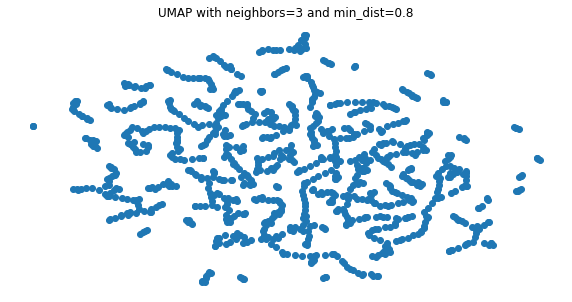

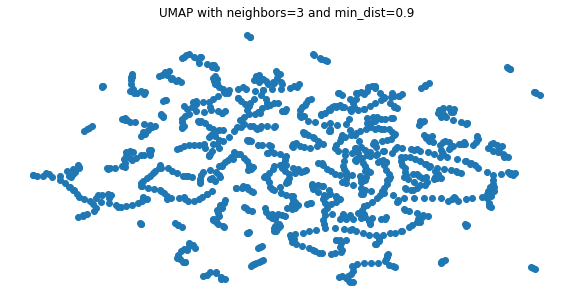

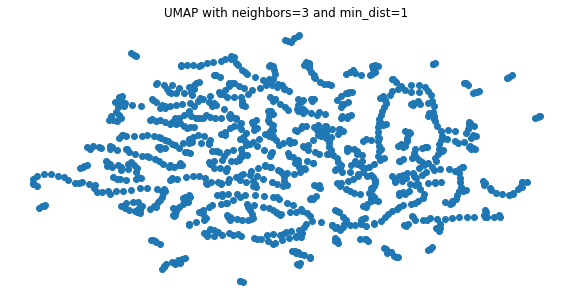

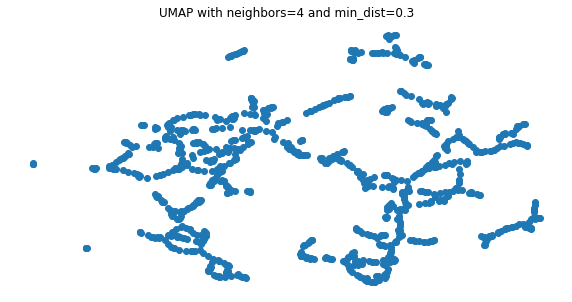

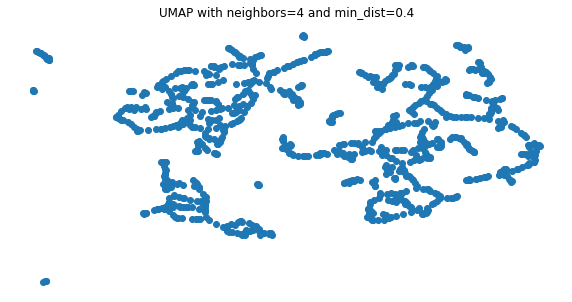

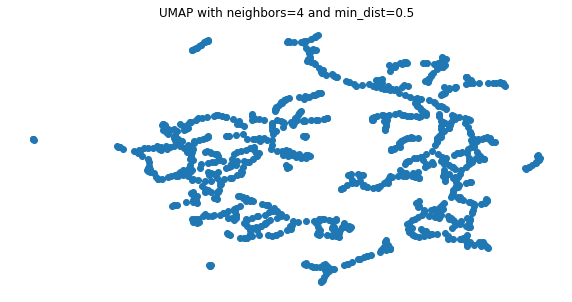

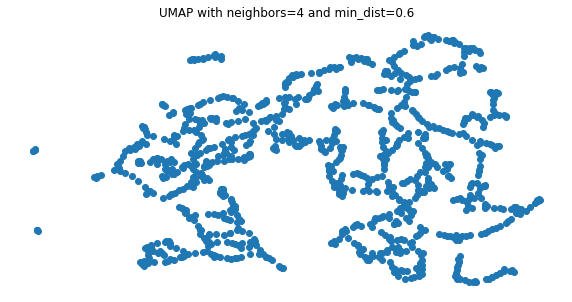

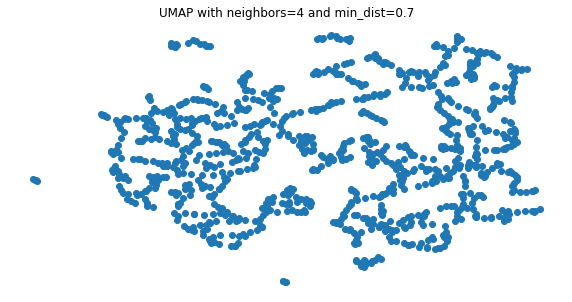

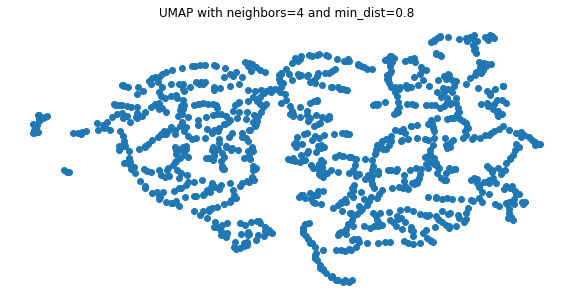

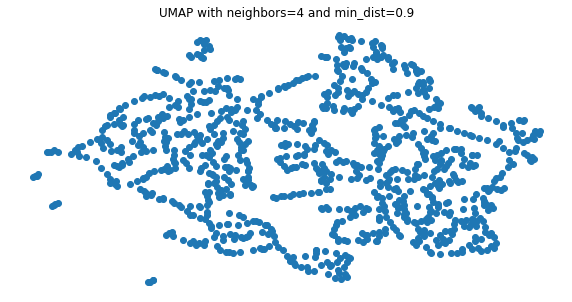

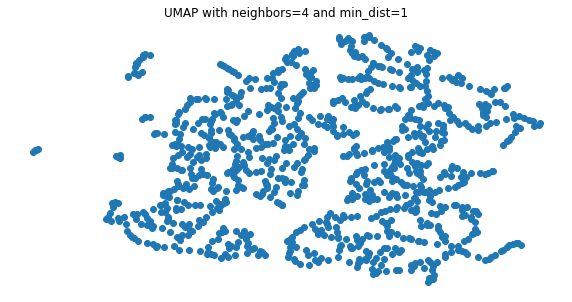

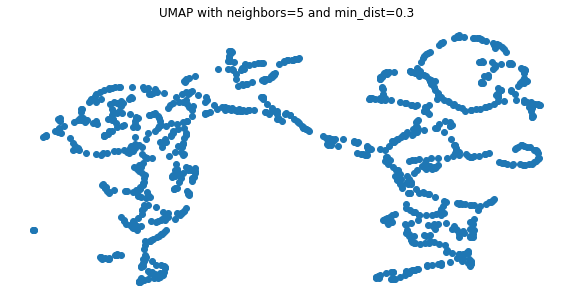

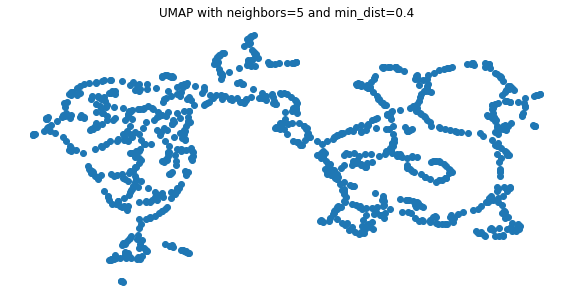

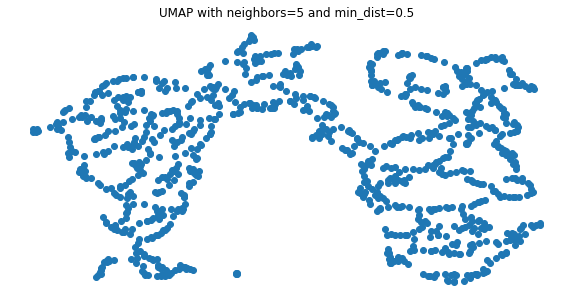

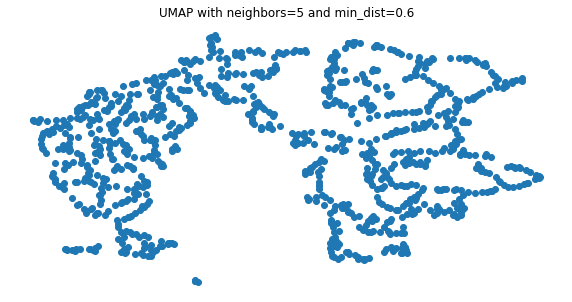

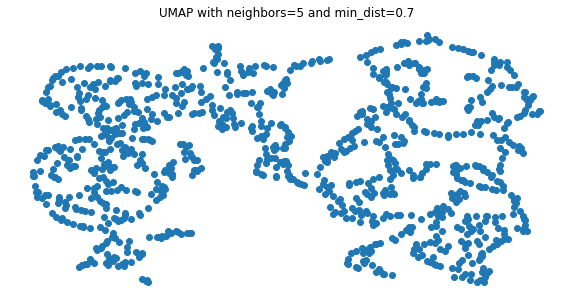

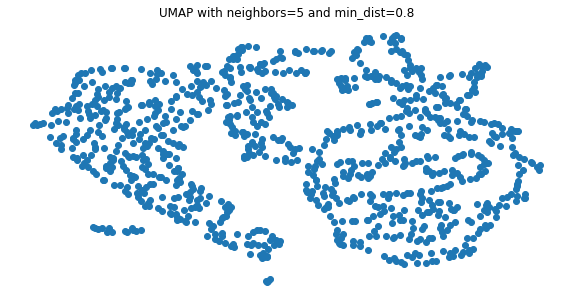

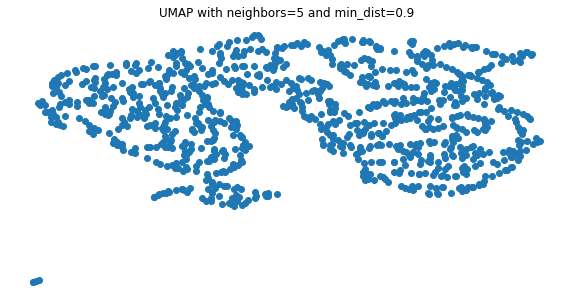

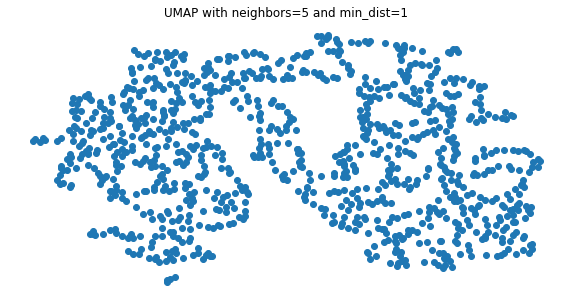

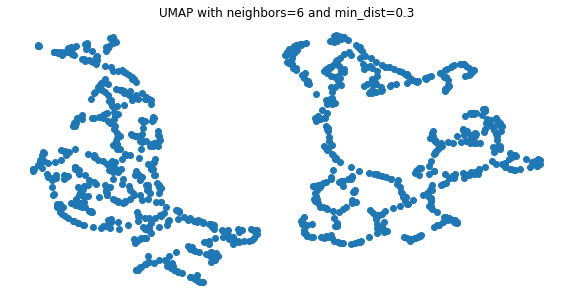

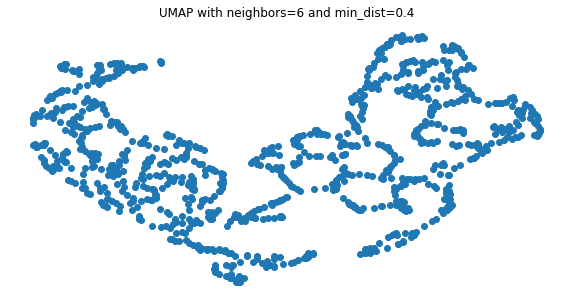

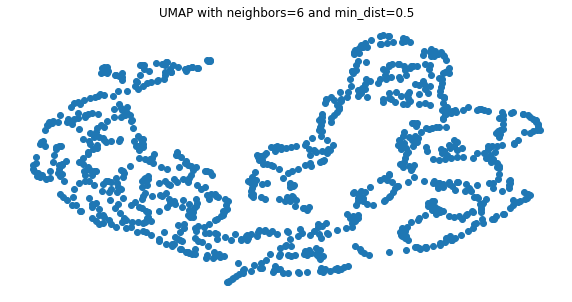

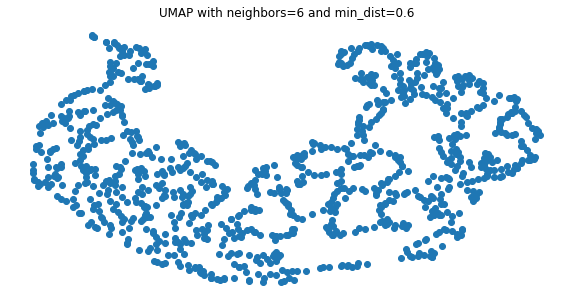

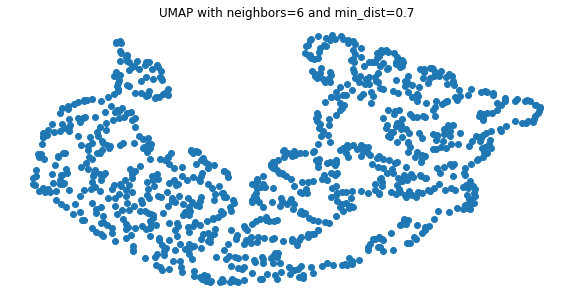

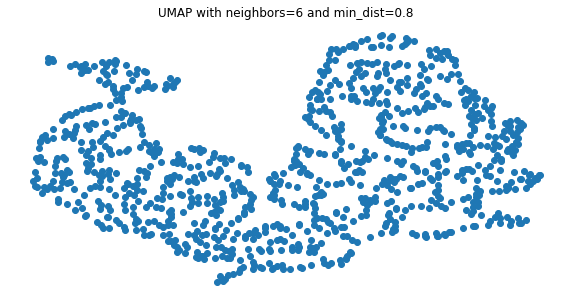

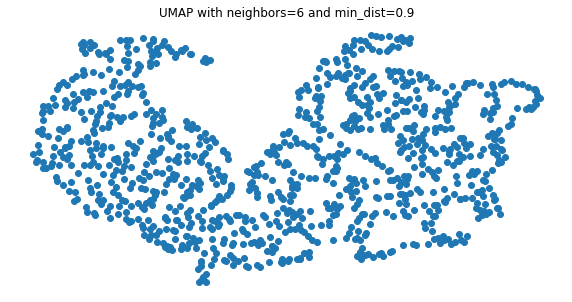

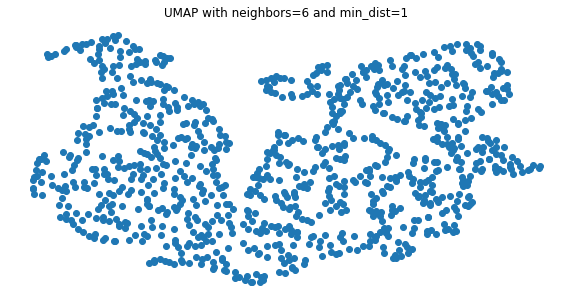

In [96]:
import umap

for i in range(2, 7, 1):
    for j in [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
        umap_results = umap.UMAP(n_neighbors=i,
                                 min_dist=j,
                                 metric='correlation').fit_transform(X)
        plt.figure(figsize=(10, 5))
        plt.scatter(umap_results[:, 0], umap_results[:, 1])
        plt.title("UMAP with neighbors={} and min_dist={}".format(i,j))
        plt.xticks([])
        plt.yticks([])
        plt.axis('off')
        plt.show()

UMAP with neighbors 5 and min dist 0.8 seems to show the three clusters the best, although its still not very clear.

UMAP's solution is similar to t-SNE's. It's difficult to see the different classes because they are not separated very clearly.

## Dendrogram with linkage method

In [97]:
from scipy.cluster.hierarchy import dendrogram, linkage


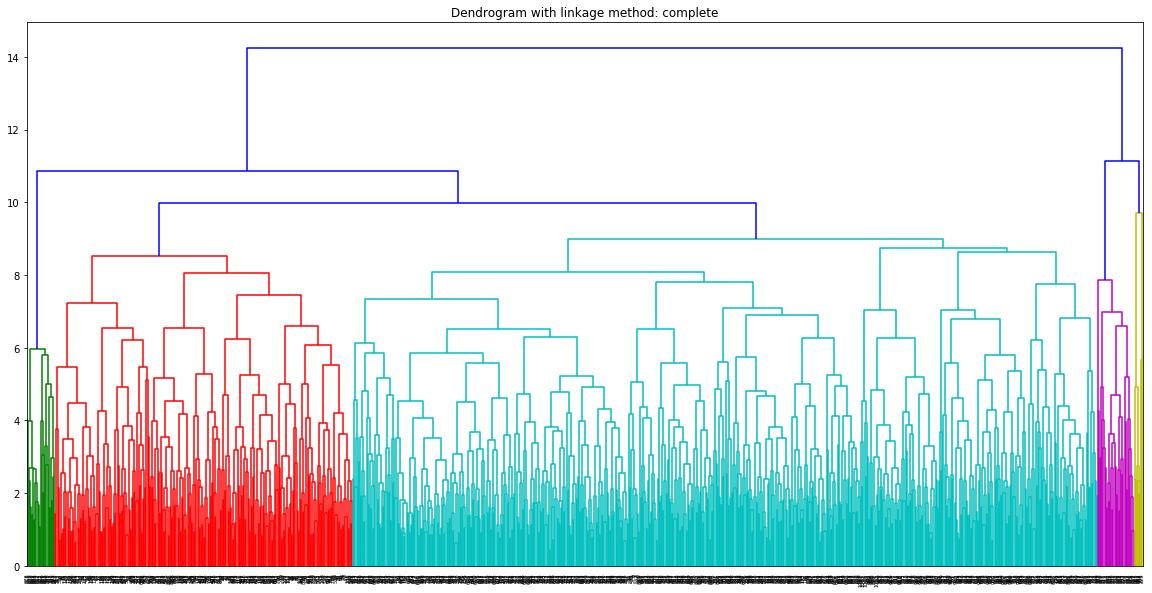

In [98]:
# Complete
plt.figure(figsize=(20,10))
plt.title("Dendrogram with linkage method: complete")
dendrogram(linkage(X_std, method='complete'))
plt.show()

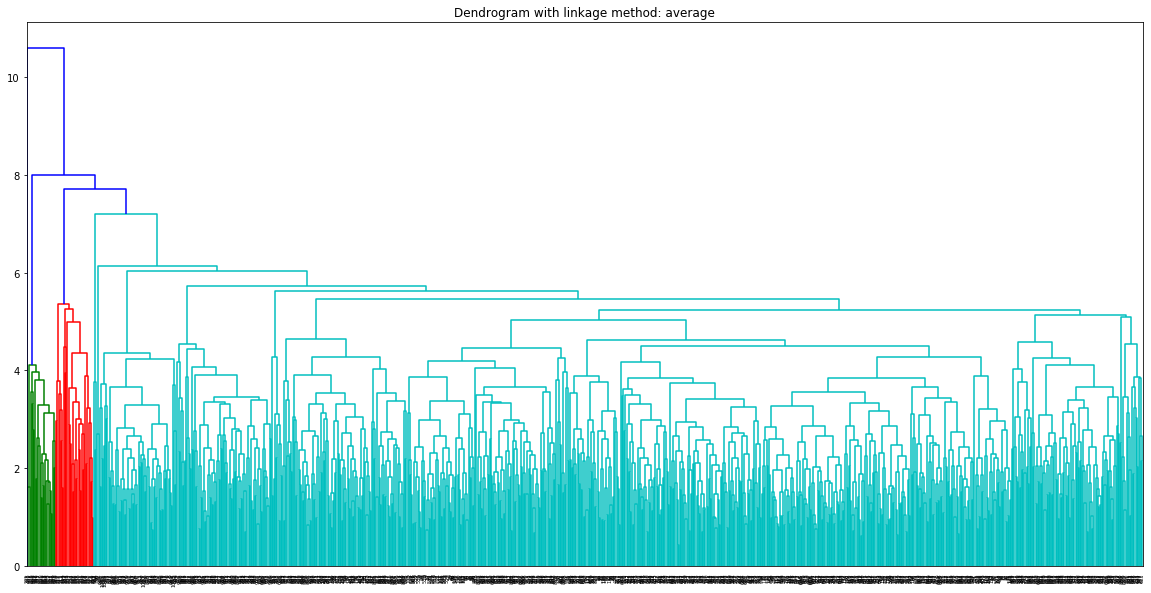

In [99]:
# Average
plt.figure(figsize=(20,10))
plt.title("Dendrogram with linkage method: average")
dendrogram(linkage(X_std, method='average'))
plt.show()

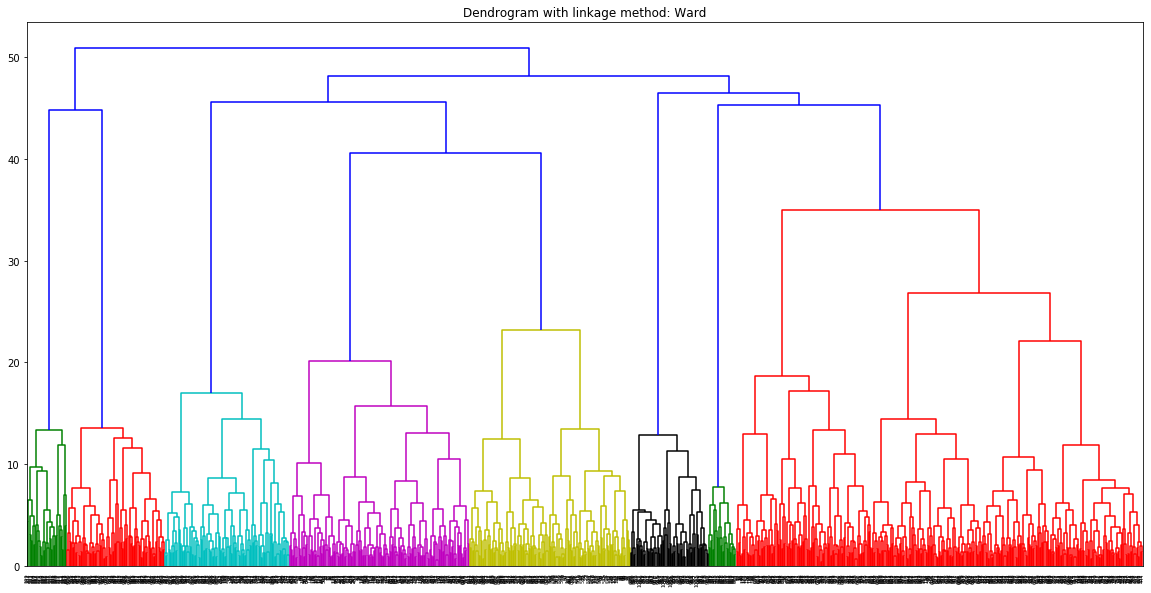

In [100]:
# Ward
plt.figure(figsize=(20,10))
plt.title("Dendrogram with linkage method: Ward")
dendrogram(linkage(X_std, method='ward'))
plt.show()

The more reasonable result is that of the ward method's. The complete and average methods produced results that are hard to distinguish with the facts as their three cluster solutions has too many or few observations for some of the clusters, whereas the ward method is more uniform. Regardless, the dendrogram is quite difficult to read due to the density of the clusters.

### Three Cluster Analysis:

For the most part, for each model, the clusters overlapped somewhat and it would be challenging to distinguish each group, if they weren't sorted by color. The ARI K-means performed the best at an index of 0.2713 while the Gaussian Mixture with covariance type spherical, performed at an index of 0.2490. The agglomeritve model scored the lowest with an index of 0.0435. In terms of ARI the best model seems to be K-means, however in terms of silhouette score the best one is DBSCAN.

## Model Selection Phase 
### Two Clusters

### K-means
Two Clusters

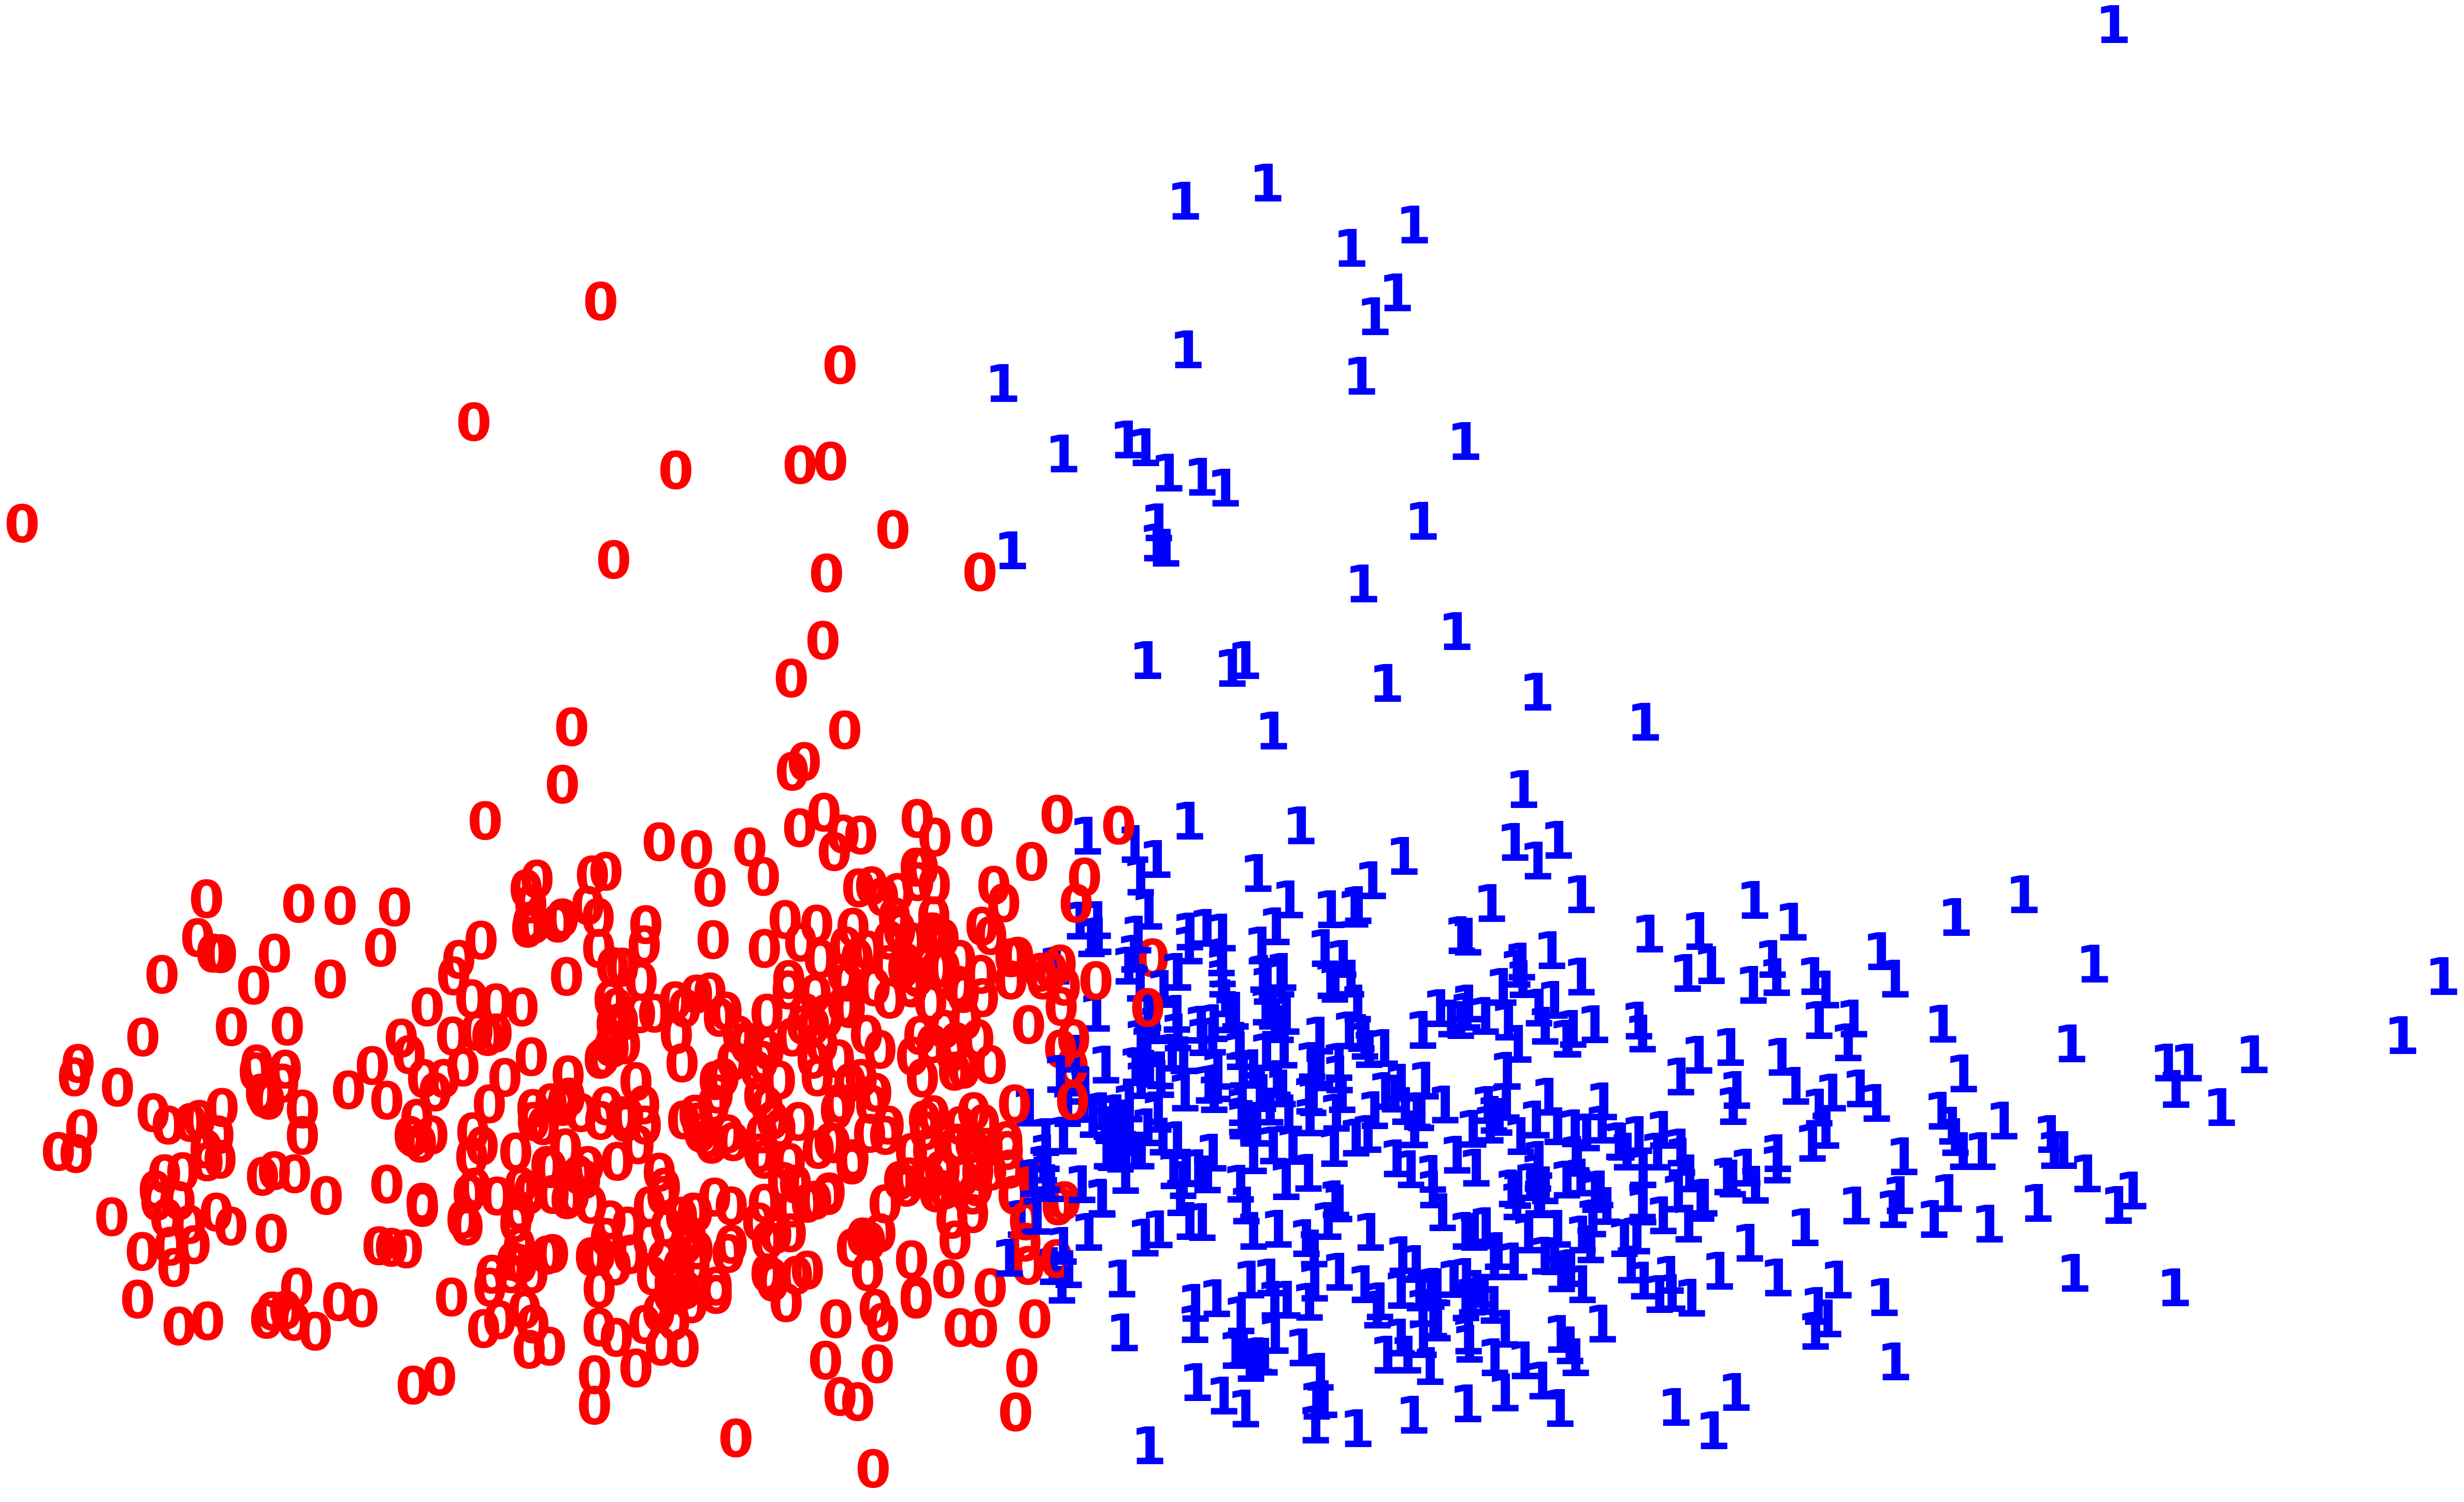

In [102]:
#Define KMeans model and fit
labels = KMeans(n_clusters = 2, random_state = 1).fit_predict(X_std)

#Plotting the predictions and the actual values
pca = PCA(n_components=12).fit_transform(X_std)


plt.figure(figsize = (10,5))
colors = 'rb'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(labels[i]),
             color = colors[labels[i]],
             fontdict = {'weight': 'bold', 'size': 100}
            )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()


In [103]:
pd.crosstab(y, labels)

col_0       0    1
DEALSIZE          
0         387   48
1         127  378
2           0   64

In [124]:
print("Adjusted Rand Index of the K-means Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, labels)))
print("Silhouette score of the K-means Clustering solution: {}".format(
    metrics.silhouette_score(X_std, labels)))

Adjusted Rand Index of the K-means Clustering solution: 0.35990180918952686
Silhouette score of the K-means Clustering solution: 0.11134890411050438


## Hierarchical Clustering
Two Clusters

In [105]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=2).fit_predict(X_std)

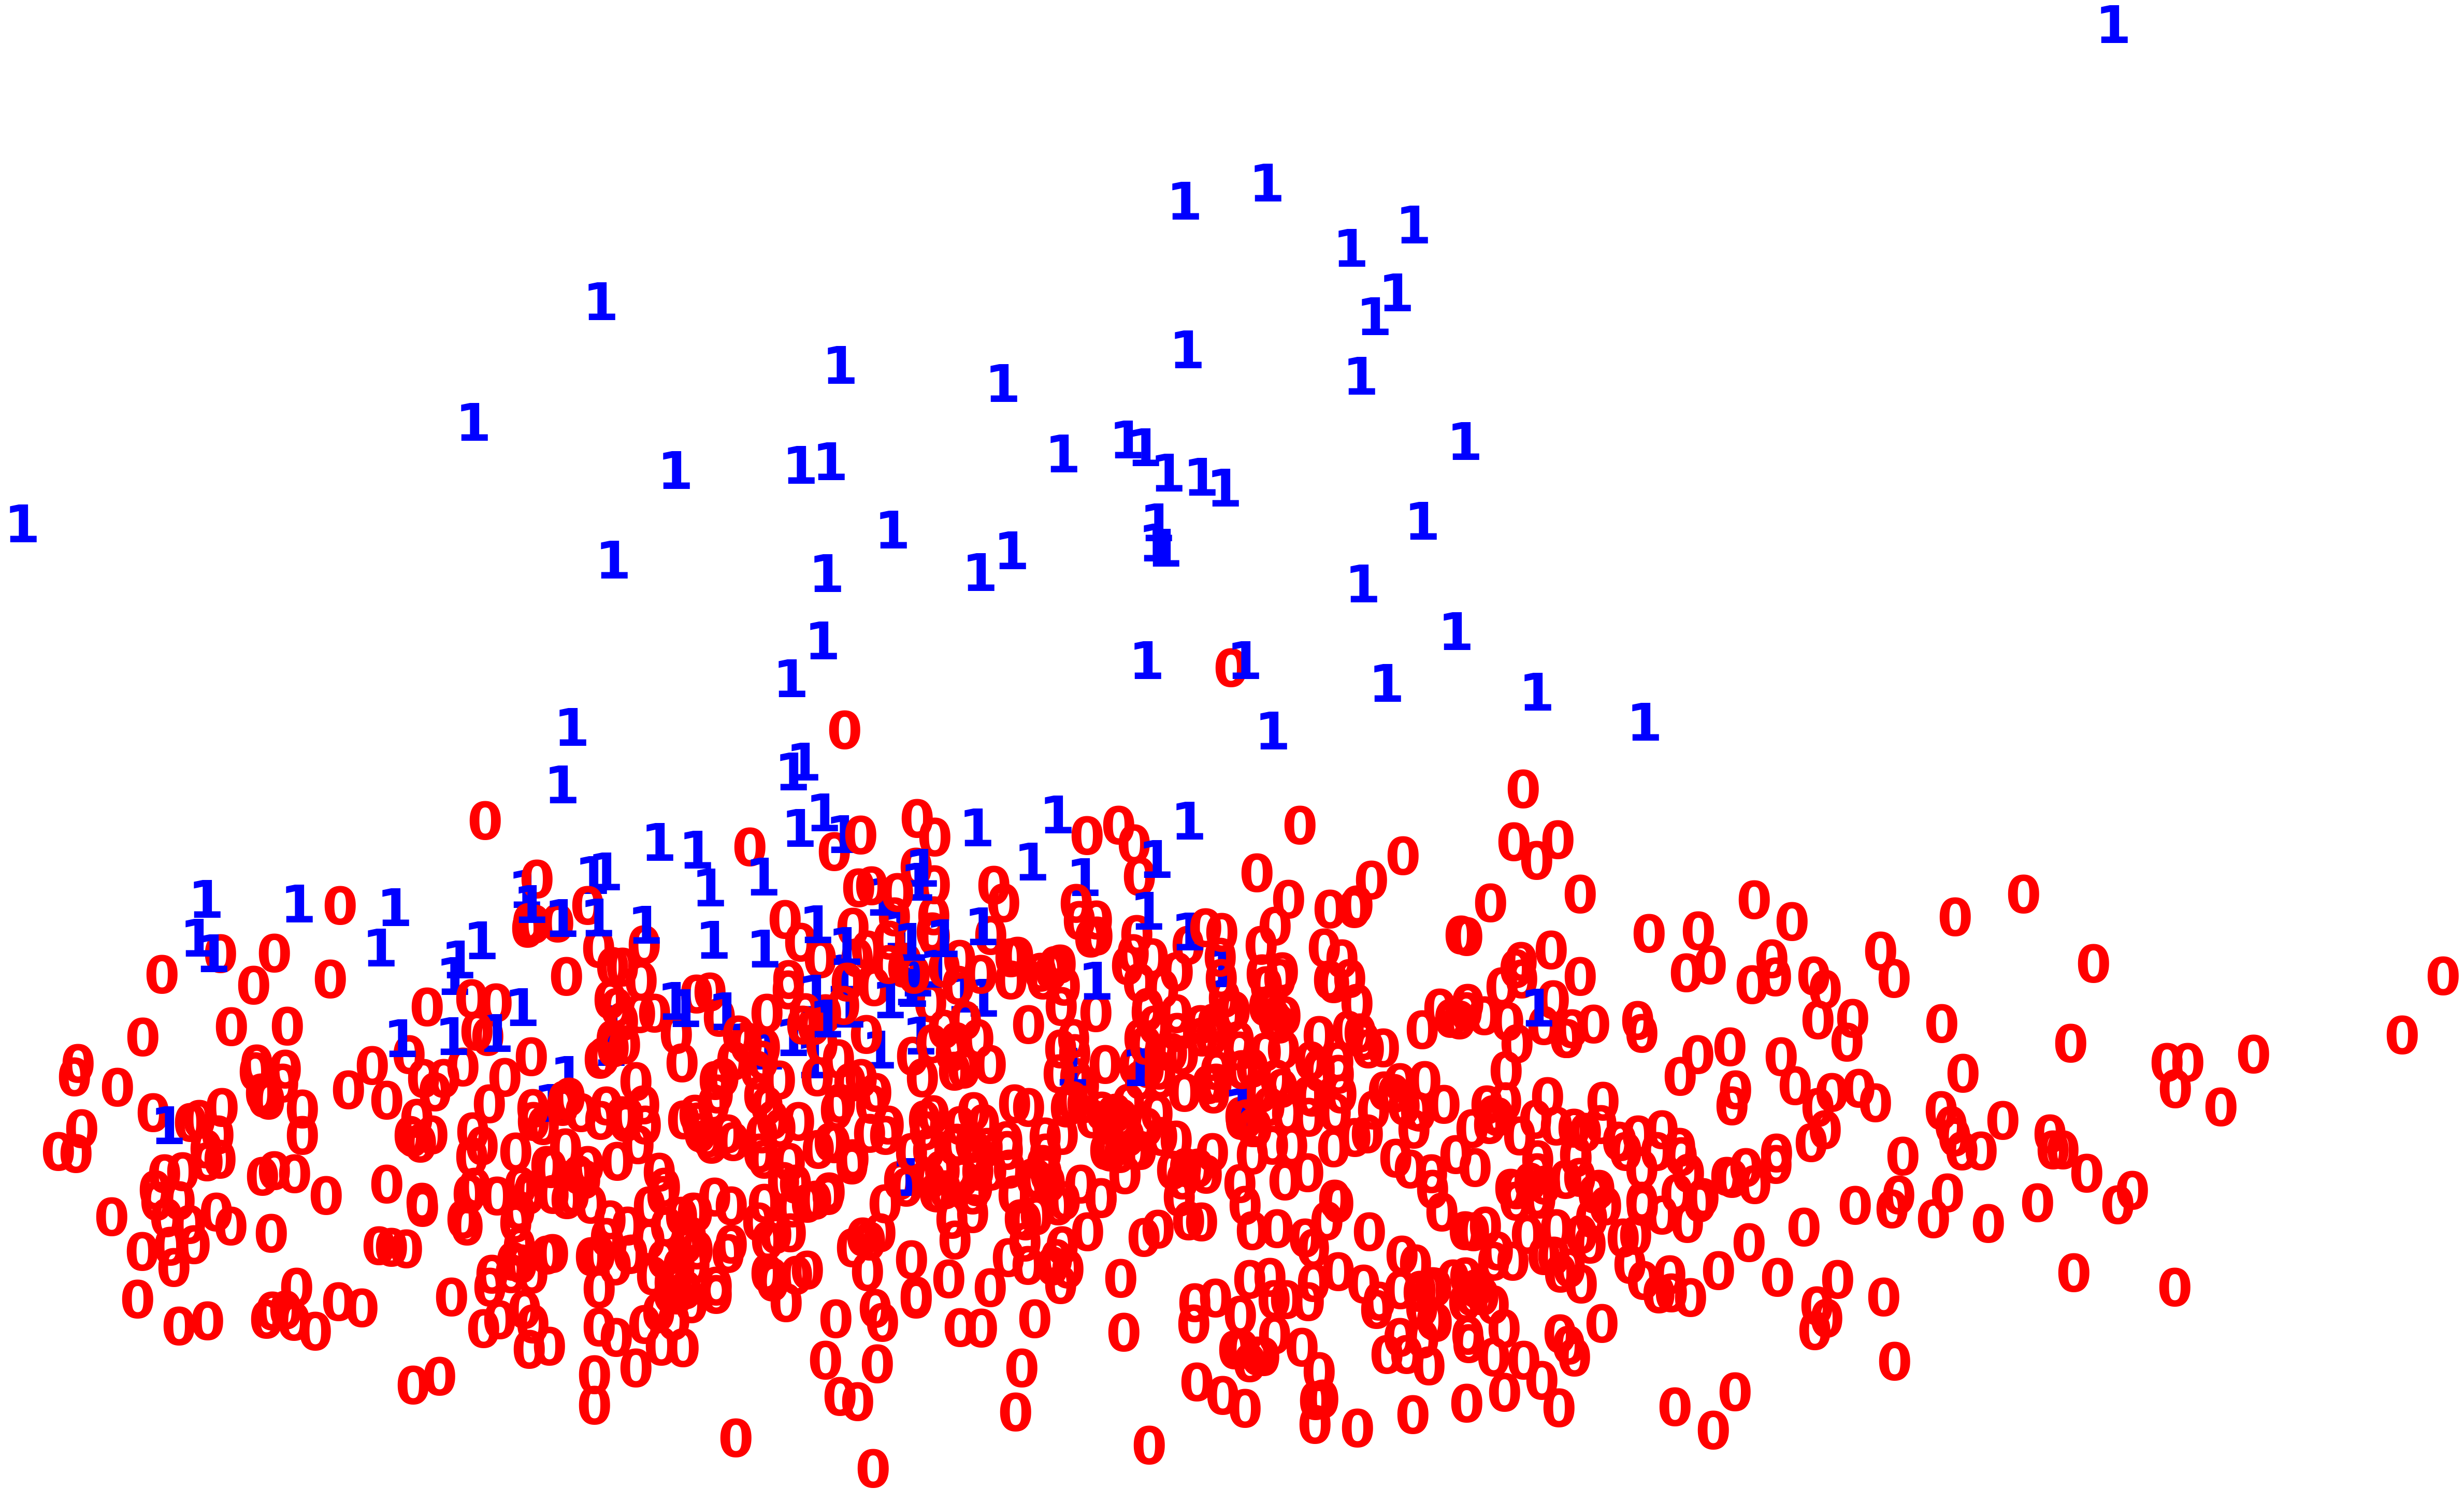

In [106]:
#Plotting the predictions and the actual values
pca = PCA(n_components=12).fit_transform(X_std)


plt.figure(figsize = (10,5))
colors = 'rb'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(agg_cluster[i]),
             color = colors[agg_cluster[i]],
             fontdict = {'weight': 'bold', 'size': 100}
            )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [107]:
pd.crosstab(y, agg_cluster)

col_0       0   1
DEALSIZE         
0         380  55
1         448  57
2          52  12

In [125]:
print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, agg_cluster)))
print("Silhouette score of the Agglomerative Clustering solution: {}".format(
    metrics.silhouette_score(X_std, agg_cluster)))

Adjusted Rand Index of the Agglomerative Clustering solution: 0.010565960300657888
Silhouette score of the Agglomerative Clustering solution: 0.1912584272099419


## Gaussian Mixture
Two Clusters

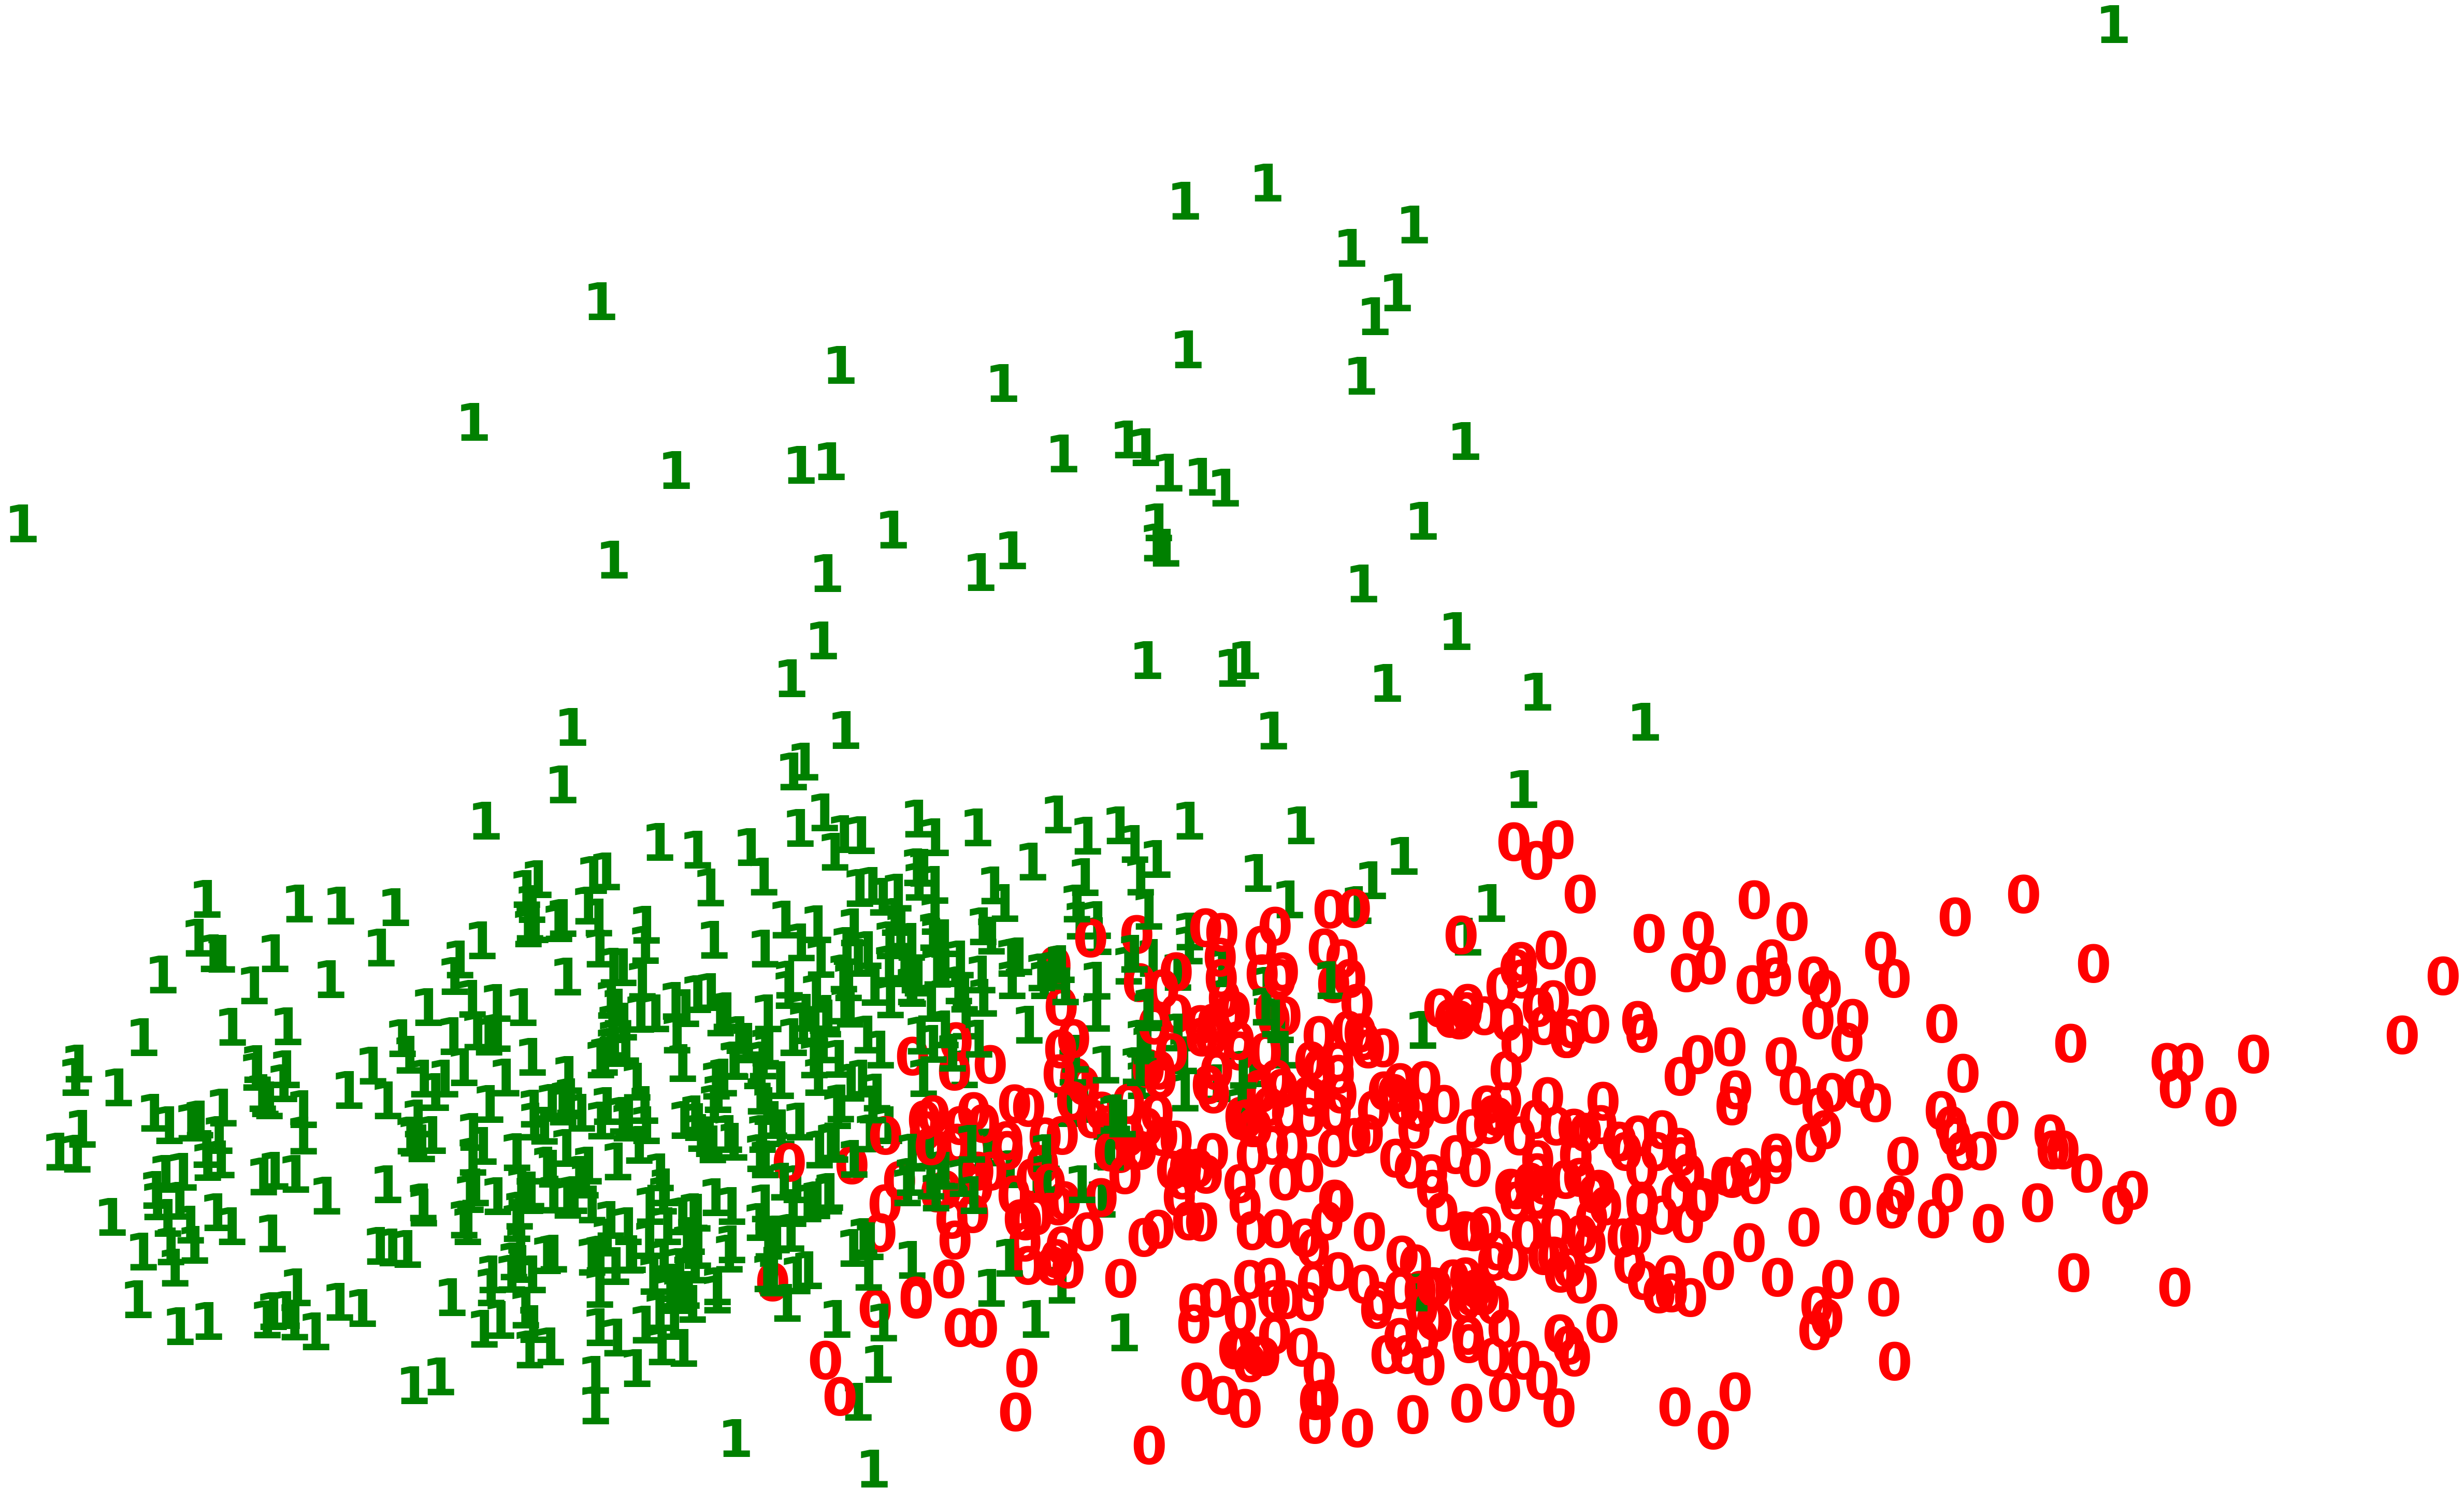

In [109]:
# Fit model and use paramater tuning from three clusters

gmm_cluster = GaussianMixture(n_components=2, covariance_type = 'spherical', random_state=1).fit_predict(X_std)

pca = PCA(n_components=12).fit_transform(X_std)

plt.figure(figsize = (10,5))
colors = 'rg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(gmm_cluster[i]),
             color = colors[gmm_cluster[i]],
             fontdict = {'weight': 'bold', 'size': 100}
            )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [110]:
pd.crosstab(y, gmm_cluster)

col_0       0    1
DEALSIZE          
0          71  364
1         330  175
2          49   15

In [126]:
print("Adjusted Rand Index of the Gaussian Mixture Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, gmm_cluster)))
print("Silhouette score of the Gaussian Mixture Clustering solution: {}".format(
    metrics.silhouette_score(X_std, gmm_cluster)))

Adjusted Rand Index of the Gaussian Mixture Clustering solution: 0.20963508354303206
Silhouette score of the Gaussian Mixture Clustering solution: 0.09741948680256893


#### Two Cluster Analysis:

Similar to the three cluster analysis, for each model, the clusters overlapped somewhat and it would be challenging to distinguish each group, if they weren't sorted by color. The ARI K-means performed the best at an index of 0.3600 while the Gaussian Mixture with covariance type spherical, performed at an index of 0.2096. The agglomeritve model scored the lowest with an index of 0.0106. In terms of ARI the best model seems to be K-means, however in terms of silhouette score the best one is Agglomerative Clustering.

## Results
After tuning the Gaussian model, the ARI improved from 0.1806 to 0.2490 and achieved a silhouette score improvement from 0.0974 to 0.1024. Based on my highest value of an ARI of 0.3600 with K-Means two clusters and visual inspections, it's pretty clear that the given data does not do a sufficient job of segmenting the size of deals with customers. There seems to be a large overlap of sales data. Small, medium and large deal sizes don't show significant separation. Looking at the clusters it seems that small and large deal sizes share the most overlap so that could tell us that the customers that are purchasing large deals, have similar buying characteristics to small deals. The results from this project seems that the particular dataset doesn't cluster well. Therefore, the graphs from the models don't show three clearly defined clusters. 

PCA visually seaparates the clusters a little better than t-SNE and UMAP. There could be similar instances too close for t-SNE reduction and UMAP, since UMAP is very similar to t-SNE, with higher processing speed. PCA is a linear method of dimensionality reduction where t-SNE and UMAP is non-linear.

## Discussion and recommendation
Since I analyzed sales in the U.S., one of the next steps would be to use all the sales data in each country and not import the postalcode dataset. I would dig deeper into the sales data by country and would examine whether there are certain products sold in the U.S. that may not be sold anywhere else, and do this for each country. From there, I could group the data based on the predictions to examine any underlying similarities. 

If I wanted to keep the postalcode dataset, I could dive deeper into the other countries regarding the mean household income and combine all those datasets to further improve the ARI and silhouette scores. 